# Проект: вариант 4
Данный вариант итогового проекта является примером тестового задания из компании OZON.

## Задание 1
В данном задании вам предлагается написать несколько SQL-запросов для определенных таблиц. В каждом случае вам НЕ будет предоставленна таблица в явном виде. Однако, вам будет дан пример таблицы с данными.

1. Посчитать % изменение количества клиентов, совершивших покупку, месяц-к-месяцу (пример таблицы приведен ниже)

<img src="https://drive.google.com/uc?export=download&id=1OR3pfy6qwY4tUMIwC7v1rDH34cLjmee-" width=600 height=1000 />

Для корректного отображения PostgreSQL-запросов в Юпитер-ноутбуке текст запросов закомменчен

In [1]:
# SELECT
#     Months,
#     100 * Amount_clients / lag(Amount_clients) OVER (ORDER BY Months ASC) AS Percent_clients_month_to_month
# FROM (
#     SELECT 
#         COUNT(DISTINCT client_id) AS Amount_clients,
#         date_trunc('month', order_date) AS Months
#     FROM table_1
#     GROUP BY Months
#     ORDER BY Months ASC
#     ) AS a

2. Вывести сумму GMV (Gross Merchandise Value) с нарастающим итогом по дням (пример таблицы приведен ниже).

<img src="https://drive.google.com/uc?export=download&id=10Glh-ICHYu8QqO8lC0E8zo-whJZGlXkn" width=600 height=1000 />

In [2]:
# SELECT 
#     fact_date,
#     SUM(gmv) OVER w AS Total_GMV
# FROM table_2
# WINDOW w AS (
#     ORDER BY fact_date ASC
#     ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW)
# ORDER BY fact_date ASC

3. Получить время отклика на каждое письмо (письмо идентифицируется по полю mail_id), отправленное пользователем mr_employee@ozon.ru.

Дана таблица с логом электронных писем пользователя mr_employee@ozon.ru (т.е. письма, отправленные с этой электронной почты и полученные на нее). У всех цепочек сообщений уникальная тема. В одной цепочке может быть несколько писем (пример таблицы приведен ниже).

<img src="https://drive.google.com/uc?export=download&id=1FtQ0sNbZooSbsoXW2RVG7Pae9Bg4DvzZ" width=600 height=1000 />

In [3]:
# SELECT 
#     mail_id,
#     (MIN(answer_timestamp) - timestamp) AS response_time
# FROM (
#     SELECT 
#         l.mail_id AS mail_id,
#         l.mail_from AS mail_from,
#         l.timestamp AS timestamp,
#         r.timestamp AS answer_timestamp
#     FROM table_3 AS l
#     JOIN table_3 AS r
#         ON l.mail_from = r.mail_to 
#             AND l.mail_to = r.mail_from 
#             AND l.mail_subject = r.mail_subject
#         WHERE r.timestamp > l.timestamp
#     ) AS t1
# WHERE mail_from = 'mr_employee@ozon.ru'
# GROUP BY mail_id, timestamp

4. Вывести id сотрудников с разницей в заработной плате в пределах 5000 рублей (пример таблицы приведен ниже).

<img src="https://drive.google.com/uc?export=download&id=1Z0my3e1Q1U6gxx3hBpWCyuvLJtTckcHy" width=600 height=1000 />

In [4]:
# SELECT
#     t1.employee_id,
#     ARRAY_AGG(DISTINCT t2.employee_id) AS employee_ids_delta_5000
# FROM table_4 AS t1, table_4 AS t2
# WHERE t2.salary_rub - 5000 <= t1.salary_rub AND t1.salary_rub <= t2.salary_rub + 5000  
# GROUP BY t1.employee_id

## Задание 2 - Case Study. Опыт продавца

Схемы работы Маркетплейса

Маркетплейс OZON предлагает продавцам несколько схем для сотрудничества, среди них выделяют:

FBO (Fulfilment by OZON) – продавец размещает товары на складе маркетплейса. Маркетплейс сам отвечает за складскую обработку и логистику заказа до клиента. Доход площадки складывается из комиссии за витрину, складские операции и логистику.

FBS (Fulfilment by seller) – продавец самостоятельно хранит товары на своём складе и отвечает за складскую обработку. После получения заказа в Личном кабинете (ЛК), продавец его обрабатывает и передаёт в логистику Маркетплейса. Доход площадки складывается из комиссии за витрину и логистику.

FBS 2.0 / Real FBS / DBS (Delivery by seller) – продавец самостоятельно хранит товары на своём складе и отвечает за складскую обработку. После получения заказа в Личном кабинете (ЛК) продавец его обрабатывает и передаёт в любую удобную ему логистику. Доход площадки складывается из комиссии за витрину.

Более подробную информацию можно найти по ссылке: https://seller-edu.ozon.ru/

Личный кабинет продавца

Для начала своей работы продавец проходит регистрацию в личном кабинете продавца . Для получения первого заказа необходимо настроить параметры товаров, складов, логистики. Процесс занимает некоторое время, и продавец может уйти с площадки, так и не запустив продажи.

Задание к Case Study

1. Нарисовать процесс регистрации и выхода продавца на Маркетплейс от момента регистрации до 1-ой продажи по схеме DBS и описать основные отличия от схемы FBO и FBS;

2. Описать основные сложности, которые могут возникнуть на каждом этапе с момента регистрации и первой продажи по схеме DBS;

3. Разработать метрики, которые на ваш взгляд могут показать ключевые отличия в процессах между указанными выше схемами работы;

4. Установить нормативные значения (KPI) по метрикам и обосновать релевантность и реалистичность этих KPI

**Презентация с решением 2 задания находится по ссылке: https://drive.google.com/file/d/1QJfhbOnsHVUyAiloYWe-vDmR9aJvlHFs/view?usp=sharing**

## Задание 3

Метрики — показатели, с помощью которых измеряют эффективность процессов на каждом этапе.

Суть метрики - придумать такой численный показатель, который бы наиболее репрезентативно и одним числом показывал положение дел в конкретном процессе. Также, метрику должно быть удобно отслеживать в динамике, чтобы понимать, повлияли ли улучшения в бизнес-процессах положительно на какие-то аспекты бизнеса, или же отрицательно.

Задача:
1. Посчитать OnTime - Метрика своевременности доставки. (Доставили в плановую дату доставки или нет), в %

 - Необходимо видеть изменение метрики по дням;

 - Необходимы разрезы по перевозчикам, по типу доставки, по кластерам склада, по таймслотам;

2. Посчитать PromisedClick2Delivery - метрика обещанного срока доставки (от даты заказа до первой плановой даты доставки), в сутках.

 - Необходима динамика по дням, неделям, месяцам;

 - Необходимо сравнение перевозчиков;

 - Необходимо понимание уровня метрики из кластера в кластер.

3. Посчитать Click2Delivery - метрика фактического срока доставки (от даты заказа до момента вручения), в сутках.

 - Необходимо сравнение с метрикой PromisedClick2Delivery;

 - Необходимо понимание кластеров, где заказы доставляются быстрее, чем мы обещаем клиентам;

4. Посчитать GMV Accepted - метрика совокупного объема продаж (считается по заказам, оформленным в указанный день), в рублях.

 - Необходимо видеть изменение метрики по дням;

 - Необходимы разрезы по перевозчикам, по типу доставки, по кластерам склада;

5. Посчитать Return Rate - доля возвратов (отношение количества возвратов к заказам в этот день), в %.

 - Необходимо видеть изменение метрики по дням;

 - Необходимы разрезы по перевозчикам, по кластерам склада и клиента;

6. Посчитать GMV D-R - метрика, отражающая совокупный объем доставленных заказов за вычетом возвратов, в рублях.

 - Необходимо видеть изменение метрики по дням (для всех дней, которые были раньше, чем дата расчета метрики);

 - Необходимы разрезы по перевозчикам, по типу доставки, по кластерам склада.

Описание таблиц

Все данные находятся в табличном виде в Clickhouse

Таблица logistic_online содержит данные о логистике.

date_order - дата, в которую клиент оформляет заказ

number_order - уникальный номер заказа клиента (в столбце номер может повторяться, т.к. заказы переносятся и имеют раные даты доставки)

timeslot_number - нумерация кол-ва попыток доставить в плановую дату доставки. Если доставка не была осуществлена, то заказ переносится на новую дату

result_data_order - дата, в которую заказ был доставлен клиенту

delivery_type - выбранный клиентом способ получения заказа (курьерка или самовывоз)

carrier_name - перевозчик, которым заказ доставляется клиенту

seller_ID - уникальный идентификатор продавца

order_status - последний актуальный статус заказа (фиксируется во всех строках последний статус заказа)

customer_cluster - региональная принадлежность клиента

warehouse_cluster - региональная принадлежность продавца

Таблица product_online содержит данные о товарах в заказе.

number_order - уникальный номер заказа клиента (в столбце номер может повторяться, т.к. так как в одном заказе может быть несколько товаров)

product_ID - уникальный номер товара (В столбце номер может повторяться, т.к. так как один товар может быть в заказах нескольких клиентов)

product_price - стоимость одной единицы товара в рублях

amount - количество единиц товара в заказе

Таблица returns_online содержит данные о возвратах

number_order - уникальный номер заказа клиента (в столбце номер может повторяться, т.к. так как в одном заказе может быть несколько товаров)

product_ID - уникальный номер товара (в столбце номер может повторяться, т.к. так как один товар может быть в заказах нескольких клиентов)

amount_return - количество единиц товара, которые были возвращены (не больше, чем количество единиц товара, приобретенных в указаном заказе)

return_date - дата совершения возврата

In [5]:
# Файлы csv были скачаны из ClickHouse с использованием Tabix и загружены на GoogleDrive

In [6]:
# Импортируем нужные библиотеки
import pandas as pd
import re
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
# Установим стиль для всех графиков
sns.set(
font_scale=1,
style="whitegrid",
rc={'figure.figsize':(17,9)}
)

1. Посчитать OnTime - Метрика своевременности доставки. (Доставили в плановую дату доставки или нет), в %

Необходимо видеть изменение метрики по дням;

Необходимы разрезы по перевозчикам, по типу доставки, по кластерам склада, по таймслотам;

In [8]:
# Таблица logistic_online содержит данные о логистике, загрузим её в датафрейм logistics
logistics = pd.read_csv('https://drive.google.com/uc?export=download&id=1JM66esMeGXbgMYONBwUyA_wnf3_bZt0W')

In [9]:
# Посмотрим на данные
logistics.head()
# date_order - дата, в которую клиент оформляет заказ
# number_order - уникальный номер заказа клиента 
#     (в столбце номер может повторяться, т.к. заказы переносятся и имеют разные даты доставки)
# timeslot_number - нумерация кол-ва попыток доставить в плановую дату доставки. 
#     Если доставка не была осуществлена, то заказ переносится на новую дату
# result_data_order - дата, в которую заказ был доставлен клиенту
# delivery_type - выбранный клиентом способ получения заказа (курьерка или самовывоз)
# carrier_name - перевозчик, которым заказ доставляется клиенту
# seller_ID - уникальный идентификатор продавца
# order_status - последний актуальный статус заказа (фиксируется во всех строках последний статус заказа)
# customer_cluster - региональная принадлежность клиента
# warehouse_cluster - региональная принадлежность продавца
# Этого нет в описании данных, но видимо столбец planned_data_order означает плановую дату доставки

,date_order,number_order,planned_data_order,timeslot_number,result_data_order,delivery_type,carrier_name,seller_ID,order_status,customer_cluster,warehouse_cluster
0,2021-5-01,313655114,2021-14-01,1,2021-11-01,Самовывоз,3PL 1,301202,Доставлен,Кластер Краснодар,Кластер Москва
1,2021-3-01,315229153,2021-11-01,1,2021-8-01,Курьер,Самодоставка,40560,Доставлен,Кластер Московская область,Кластер Московская область
2,2021-8-01,3114106095,2021-16-01,1,2021-14-01,Курьер,Самодоставка,40560,Доставлен,Кластер Московская область,Кластер Московская область
3,2021-12-01,31145541407,2021-20-01,1,2021-15-01,Самовывоз,3PL 1,301202,Доставлен,Кластер Санкт-Петербург,Кластер Москва
4,2021-16-01,325050136,2021-26-01,1,2021-25-01,Самовывоз,3PL 1,946233,Доставлен,Кластер Санкт-Петербург,Кластер Санкт-Петербург


In [10]:
# Посмотрим размер датафрейма
logistics.shape

(6597, 11)

In [11]:
# Посчитаем количество уникальных значений в каждом столбце
logistics.nunique()

date_order             114
number_order          5976
planned_data_order     106
timeslot_number          7
result_data_order       80
delivery_type            2
carrier_name             5
seller_ID              167
order_status             5
customer_cluster        12
warehouse_cluster       11
dtype: int64

In [12]:
# Посмотрим, какой статус заказа может быть
logistics.order_status.unique()

array(['Доставлен', 'Отменен', 'На пути к клиенту', 'Ожидает сборки',
       'Спор'], dtype=object)

In [13]:
# Посчитаем количество пропущенных значений в каждом столбце
logistics.isna().sum()

date_order            625
number_order            0
planned_data_order      0
timeslot_number         0
result_data_order     890
delivery_type           0
carrier_name            0
seller_ID               0
order_status            0
customer_cluster        0
warehouse_cluster       0
dtype: int64

In [14]:
# Проверим, к каким таймслотам относятся пропущенные даты заказа
logistics.query('date_order.isna()').timeslot_number.unique()
# Все пропущенные даты заказов относятся к повторным попыткам отправить заказ

array([2, 3, 4, 5, 7, 6])

In [15]:
# Проверим, какой статус заказа имеют пропущенные даты доставки заказа
logistics.query('result_data_order.isna()').order_status.unique()
# Все пропущенные даты доставки заказа относятся к заказам, которые по разным причинам не доставлены

array(['Отменен', 'На пути к клиенту', 'Ожидает сборки'], dtype=object)

In [16]:
# Заполним пропущенные значения дат крайними датами, чтобы с одной стороны, не потерять остальные данные из этих строк,
#     а с другой эти искусственные даты было легко отфильтровать
logistics['date_order'] = logistics.date_order.fillna('1970-1-01')
logistics['result_data_order'] = logistics.result_data_order.fillna('2040-1-01')

In [17]:
# Посмотрим на типы данных
logistics.dtypes

date_order            object
number_order           int64
planned_data_order    object
timeslot_number        int64
result_data_order     object
delivery_type         object
carrier_name          object
seller_ID              int64
order_status          object
customer_cluster      object
warehouse_cluster     object
dtype: object

In [18]:
# Столбец date_order нужно привести к типу datetime, но сначала посмотрим, какие в ней есть уникальные значения
logistics.date_order.unique()
# В столбце есть некорректные значения, в которых перед числом месяца написан дополнительный "0". 
# Кроме того, дата здесь прописана в формате гггг-дд-мм
# Обратим внимание, что даты представлены в промежутке декабрь 2020 - апрель 2021

array(['2021-5-01', '2021-3-01', '2021-8-01', '2021-12-01', '2021-16-01',
       '2021-2-02', '2021-28-01', '2021-4-02', '2021-5-02', '1970-1-01',
       '2021-9-02', '2021-11-02', '2021-7-02', '2021-14-02', '2021-8-02',
       '2021-20-02', '2021-21-02', '2021-8-03', '2021-17-02',
       '2021-23-02', '2021-4-03', '2021-2-03', '2021-9-03', '2021-11-03',
       '2021-28-02', '2021-13-03', '2021-3-03', '2021-12-03',
       '2021-17-03', '2021-2-01', '2021-6-01', '2021-10-01', '2021-15-01',
       '2021-23-01', '2021-24-01', '2021-30-01', '2021-31-01',
       '2021-6-02', '2021-3-02', '2021-15-03', '2021-12-02', '2021-10-02',
       '2021-19-02', '2021-24-02', '2021-26-02', '2021-25-02',
       '2021-5-04', '2021-1-03', '2021-14-03', '2021-10-03', '2021-7-03',
       '2021-16-03', '2021-4-01', '2021-19-01', '2021-20-01',
       '2021-25-01', '2021-27-01', '2021-1-02', '2021-13-02',
       '2021-15-02', '2021-22-02', '2021-5-03', '2021-27-02',
       '2021-11-01', '2021-17-01', '2021-29-0

In [19]:
#Создадим паттерн некорректной даты
pattern = re.compile('\d\d\d\d-\d+-\d\d\d')

In [20]:
# Поменяем некорректное написание даты на корректное
logistics['date_order'] = [x[:8]+x[9:] if pattern.findall(x) else x for x in logistics['date_order']]

In [21]:
# Теперь переведем тип столбца date_order в datetime
logistics['date_order'] = pd.to_datetime(logistics.date_order, format='%Y-%d-%m')

In [22]:
# Столбец planned_data_order также нужно привести к типу datetime, посмотрим, какие в ней есть уникальные значения
logistics.planned_data_order.unique()
# В столбце нет некорректных значений. 
# Дата здесь также прописана в формате гггг-дд-мм
# Обратим внимание, что даты представлены в промежутке январь - апрель 2021

array(['2021-14-01', '2021-11-01', '2021-16-01', '2021-20-01',
       '2021-26-01', '2021-6-02', '2021-8-02', '2021-5-02', '2021-10-02',
       '2021-11-02', '2021-16-02', '2021-18-02', '2021-19-02',
       '2021-12-02', '2021-25-02', '2021-15-03', '2021-3-03', '2021-2-03',
       '2021-6-03', '2021-12-03', '2021-9-03', '2021-11-03', '2021-10-03',
       '2021-8-03', '2021-16-03', '2021-19-03', '2021-18-03',
       '2021-14-03', '2021-17-03', '2021-22-03', '2021-13-01',
       '2021-18-01', '2021-19-01', '2021-22-01', '2021-28-01',
       '2021-4-02', '2021-13-02', '2021-9-02', '2021-17-02', '2021-24-03',
       '2021-14-02', '2021-20-02', '2021-22-02', '2021-1-03', '2021-5-03',
       '2021-28-02', '2021-4-03', '2021-11-04', '2021-13-03',
       '2021-20-03', '2021-23-03', '2021-25-01', '2021-1-02',
       '2021-24-02', '2021-26-02', '2021-21-03', '2021-21-01',
       '2021-7-03', '2021-28-03', '2021-3-01', '2021-2-02', '2021-7-02',
       '2021-30-03', '2021-15-01', '2021-23-01', '20

In [23]:
# Переведем тип столбца planned_data_order в datetime
logistics['planned_data_order'] = pd.to_datetime(logistics.planned_data_order, format='%Y-%d-%m')

In [24]:
# Столбец result_data_order также нужно привести к типу datetime
logistics.result_data_order.unique()
# В столбце есть некорректные значения, в которых в числе месяца написан дополнительный "0" - как и в столбце date_order
# Дата здесь также прописана в формате гггг-дд-мм
# Обратим внимание, что даты представлены в промежутке декабрь 2020 - март 2021

array(['2021-11-01', '2021-8-01', '2021-14-01', '2021-15-01',
       '2021-25-01', '2021-26-01', '2021-28-01', '2021-6-02', '2021-5-02',
       '2021-11-02', '2021-15-02', '2021-17-02', '2021-16-02',
       '2021-12-02', '2021-21-02', '2021-19-02', '2021-5-03', '2021-2-03',
       '2021-4-03', '2021-28-02', '2021-25-02', '2021-1-03', '2021-3-03',
       '2040-1-01', '2021-10-03', '2021-14-03', '2021-12-03',
       '2021-10-01', '2021-18-01', '2021-16-01', '2021-21-01',
       '2021-19-01', '2021-31-01', '2021-4-02', '2021-10-02', '2021-6-03',
       '2021-18-02', '2021-20-02', '2021-26-02', '2021-24-02',
       '2021-27-02', '2021-15-03', '2021-4-01', '2021-22-01',
       '2021-29-01', '2021-22-02', '2021-11-03', '2021-8-03',
       '2021-13-03', '2021-9-01', '2021-9-03', '2021-7-03', '2020-29-012',
       '2021-12-01', '2021-1-02', '2021-8-02', '2021-13-02', '2021-23-01',
       '2021-9-02', '2021-14-02', '2021-13-01', '2021-5-01', '2021-2-02',
       '2021-7-02', '2021-3-02', '2021-1

In [25]:
# Поменяем некорректное написание даты на корректное
logistics['result_data_order'] = [x[:8]+x[9:] if pattern.findall(x) else x for x in logistics['result_data_order']]

In [26]:
# Теперь переведем тип столбца result_data_order в datetime
logistics['result_data_order'] = pd.to_datetime(logistics.result_data_order, format='%Y-%d-%m')

In [27]:
# Проверим типы - теперь всё верно
logistics.dtypes

date_order            datetime64[ns]
number_order                   int64
planned_data_order    datetime64[ns]
timeslot_number                int64
result_data_order     datetime64[ns]
delivery_type                 object
carrier_name                  object
seller_ID                      int64
order_status                  object
customer_cluster              object
warehouse_cluster             object
dtype: object

In [28]:
# Создадим столбец delta_order_plan, в котором будет разница между планируемой датой доставки и датой заказа, в днях
logistics['delta_order_plan'] = (logistics.planned_data_order - logistics.date_order).apply(lambda x: x.days)

In [29]:
# Создадим столбец delta_order_result, в котором будет разница между фактической датой доставки и датой заказа, в днях
logistics['delta_order_result'] = (logistics.result_data_order - logistics.date_order).apply(lambda x: x.days)

In [30]:
# Создадим столбец delta_plan_result, в котором будет разница между фактической и планируемой датами доставки, в днях
logistics['delta_plan_result'] = (logistics.result_data_order - logistics.planned_data_order).apply(lambda x: x.days)

In [31]:
# Проверим корректность данных: есть ли даты заказа ранее планируемой даты доставки
logistics.query('delta_order_plan < 0').shape[0]
# Таких дат нет

0

In [32]:
# Проверим есть ли даты заказа ранее фактической даты доставки
logistics.query('delta_order_result < 0').shape[0]
# Таких строк 947

947

In [33]:
# Т.к. мы не знаем, в каком столбце ошибка (в дате заказа или фактической дате доставки), уберем записи с некорректными данными
logistics = logistics.loc[logistics.delta_order_result >= 0]

In [34]:
# Проверим, не задвоились ли записи о заказах
double_orders = logistics.groupby(['number_order', 'timeslot_number'], as_index = False)\
    .agg({'date_order' : 'count'})\
    .sort_values('date_order', ascending = False)\
    .query('date_order > 1')
double_orders
# Мы видим, что 4 номера заказа имеют по 2 записи с разными датами заказа, все они относятся к 1 таймслоту

,number_order,timeslot_number,date_order
1246,344629456,1,2
2003,357469624,1,2
858,336693909,1,2
699,333776216,1,2


In [35]:
# Сохраним номера задвоенных заказов в список double_orders
double_orders = double_orders.number_order.to_list()

In [36]:
# Посмотрим на задвоенные заказы
logistics.query('number_order in @double_orders and timeslot_number == 1')
# Внутри пары заказы отличаются только датой заказа, остальные данные идентичны. 
# Вероятно, произошла ошибка и заказы записались заново, с новой датой

,date_order,number_order,planned_data_order,timeslot_number,result_data_order,delivery_type,carrier_name,seller_ID,order_status,customer_cluster,warehouse_cluster,delta_order_plan,delta_order_result,delta_plan_result
12,2021-02-09,336693909,2021-02-16,1,2021-02-17,Самовывоз,3PL 3,2345336,Доставлен,Кластер Екатеринбург,Кластер Московская область,7,8,1
13,2021-02-11,336693909,2021-02-16,1,2021-02-17,Самовывоз,3PL 3,2345336,Доставлен,Кластер Екатеринбург,Кластер Московская область,5,6,1
449,2021-03-04,357469624,2021-03-12,1,2040-01-01,Курьер,3PL 3,8612129,Отменен,Кластер Краснодар,Кластер Москва,8,6877,6869
450,2021-03-05,357469624,2021-03-12,1,2040-01-01,Курьер,3PL 3,8612129,Отменен,Кластер Краснодар,Кластер Москва,7,6876,6869
726,2021-02-16,344629456,2021-02-26,1,2021-03-03,Курьер,3PL 1,9504,Доставлен,Кластер Калининград,Кластер Казань,10,15,5
728,2021-02-16,344629456,2021-02-26,1,2021-03-03,Курьер,3PL 1,9504,Доставлен,Кластер Калининград,Кластер Казань,10,15,5
6426,2021-02-05,333776216,2021-02-11,1,2021-02-13,Самовывоз,3PL 1,633129,Доставлен,Кластер Санкт-Петербург,Кластер Екатеринбург,6,8,2
6427,2021-02-06,333776216,2021-02-11,1,2021-02-13,Самовывоз,3PL 1,633129,Доставлен,Кластер Санкт-Петербург,Кластер Екатеринбург,5,7,2


In [37]:
# Удалим повторные записи
logistics = logistics.drop(index=[13, 450, 728, 6427])

In [38]:
# Посмотрим на размер получившегося датафрейма
logistics.shape

(5646, 14)

In [39]:
# Посмотрим на сам датафрейм
logistics.head()

,date_order,number_order,planned_data_order,timeslot_number,result_data_order,delivery_type,carrier_name,seller_ID,order_status,customer_cluster,warehouse_cluster,delta_order_plan,delta_order_result,delta_plan_result
0,2021-01-05,313655114,2021-01-14,1,2021-01-11,Самовывоз,3PL 1,301202,Доставлен,Кластер Краснодар,Кластер Москва,9,6,-3
1,2021-01-03,315229153,2021-01-11,1,2021-01-08,Курьер,Самодоставка,40560,Доставлен,Кластер Московская область,Кластер Московская область,8,5,-3
2,2021-01-08,3114106095,2021-01-16,1,2021-01-14,Курьер,Самодоставка,40560,Доставлен,Кластер Московская область,Кластер Московская область,8,6,-2
3,2021-01-12,31145541407,2021-01-20,1,2021-01-15,Самовывоз,3PL 1,301202,Доставлен,Кластер Санкт-Петербург,Кластер Москва,8,3,-5
4,2021-01-16,325050136,2021-01-26,1,2021-01-25,Самовывоз,3PL 1,946233,Доставлен,Кластер Санкт-Петербург,Кластер Санкт-Петербург,10,9,-1


In [40]:
# Создадим копию датафрейма, с которой будем работать в этом задании
logistics_1 = logistics.copy(deep=True)

In [41]:
# Для расчета метрики OnTime нам нужны только доставленные заказы, поэтому отфильтруем датафрейм по статусу заказа
logistics_1 = logistics_1.loc[logistics_1['order_status'] == "Доставлен"]

In [42]:
# Добавим новый столбец OnTime_delivered, в котором будет 1 - если заказ доставлен вовремя, и 0 - если не вовремя
logistics_1['OnTime_delivered'] = [1 if x == 0 else 0 for x in logistics_1['delta_plan_result']]

In [43]:
# Посчитаем сколько всего заказов было запланировано к доставке на дату, и сколько из них фактически было доставлено в этот день
OnTime_metrics = logistics_1.groupby('planned_data_order', as_index = False)\
    .agg({'number_order':'count','OnTime_delivered' : 'sum'})\
    .rename(columns = {'number_order' : 'total_orders', 'OnTime_delivered' : 'OnTime_orders'})

In [44]:
# Добавим столбец OnTime_percent, в которой будет метрика OnTime в % по каждому дню
OnTime_metrics['OnTime_percent'] = round(100 * OnTime_metrics.OnTime_orders / OnTime_metrics.total_orders, 1)

In [45]:
# Посмотрим на значение метрики OnTime_percent за каждый день в столбце OnTime_percent
OnTime_metrics

,planned_data_order,total_orders,OnTime_orders,OnTime_percent
0,2021-01-01,5,0,0.0
1,2021-01-02,2,0,0.0
2,2021-01-03,1,0,0.0
3,2021-01-05,11,2,18.2
4,2021-01-06,2,0,0.0
...,...,...,...,...
76,2021-03-21,7,0,0.0
77,2021-03-22,9,0,0.0
78,2021-03-23,2,0,0.0
79,2021-03-24,1,0,0.0


/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


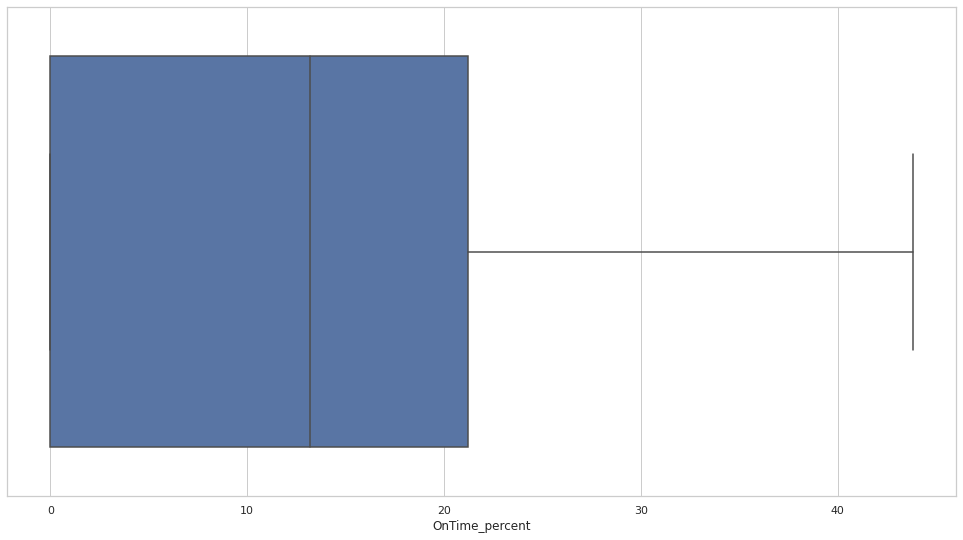

In [46]:
# Посмотрим на распределение получившихся значений OnTime_percent
sns.boxplot(OnTime_metrics.OnTime_percent)
# Выбросов нет, поэтому мы можем посчитать среднее значение

In [47]:
# Посмотрим на среднее значение метрики OnTime за весь имеющийся период, в %
OnTime_metrics_avg = round(OnTime_metrics.OnTime_percent.mean(), 1)
OnTime_metrics_avg

13.5

In [48]:
# Для следующего шага добавим значение среднего в датафрейм с метрикой по дням
OnTime_metrics['OnTime_avg'] = OnTime_metrics_avg

Text(0, 0.5, 'OnTime, %')

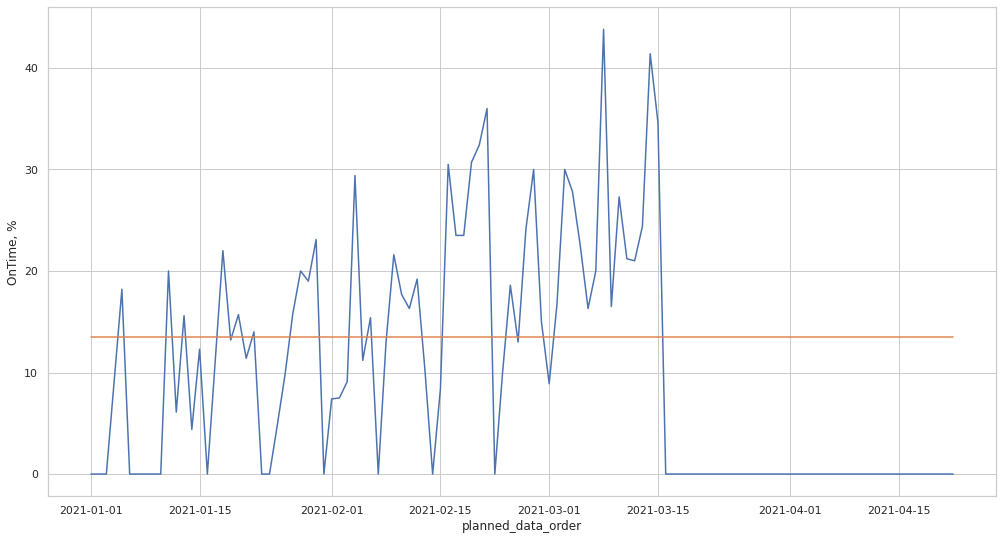

In [49]:
# Построим график измения OnTime в % по дням и линию среднего значения метрики
ax = sns.lineplot(data = OnTime_metrics, x = 'planned_data_order', y = 'OnTime_percent')
sns.lineplot(data = OnTime_metrics, x = 'planned_data_order', y = 'OnTime_avg')
ax.set_ylabel('OnTime, %')

/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


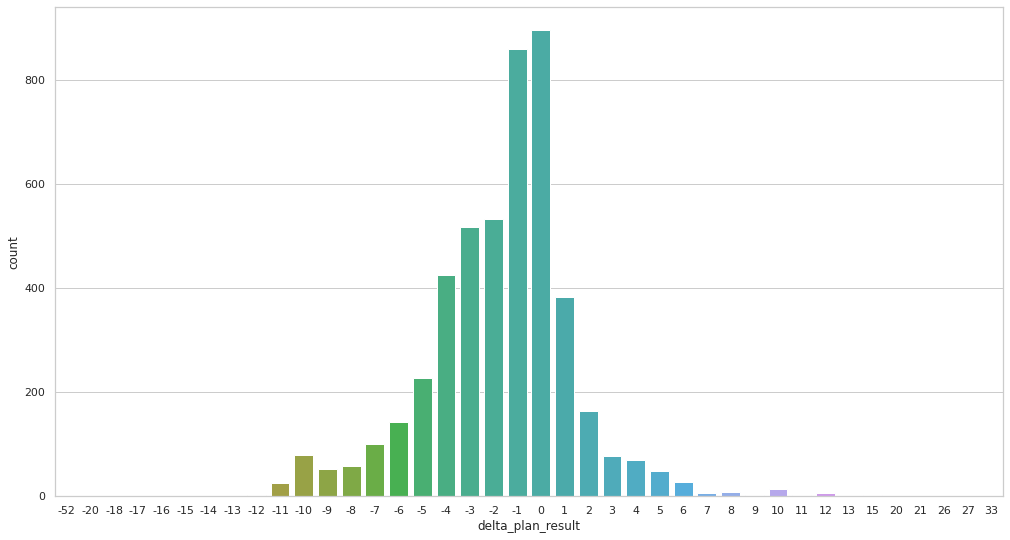

In [50]:
# Дополнительно посмотрим на распределение разницы между планируемым и фактическим сроком доставки по количеству дней
sns.countplot(logistics_1.delta_plan_result)
# По графику видно, что бОльшая часть заказов была доставлена вовремя или раньше обещанного срока (значения <= 0)

In [51]:
# Посчитаем метрику OnTime в разрезе по перевозчикам
OnTime_by_carrier = logistics_1.groupby(['planned_data_order', 'carrier_name'], as_index = False)\
    .agg({'number_order':'count','OnTime_delivered' : 'sum'})\
    .rename(columns = {'number_order' : 'total_orders', 'OnTime_delivered' : 'OnTime_orders'})

In [52]:
# Добавим столбец OnTime_percent, в которой будет метрика OnTime в % по каждому дню
OnTime_by_carrier['OnTime_percent'] = round(100 * OnTime_by_carrier.OnTime_orders / OnTime_by_carrier.total_orders, 1)

In [53]:
# Развернем таблицу
OnTime_by_carrier = OnTime_by_carrier\
    .pivot(index = 'planned_data_order', columns = 'carrier_name', values = 'OnTime_percent')\
    .reset_index()

In [54]:
# Посмотрим на датафрейм с информацией о метрике OnTime в % по дням в разрезе перевозчиков
OnTime_by_carrier.head()

carrier_name,planned_data_order,3PL 1,3PL 2,3PL 3,3PL 4,Самодоставка
0,2021-01-01,0.0,0.0,NaN,NaN,NaN
1,2021-01-02,NaN,0.0,NaN,NaN,NaN
2,2021-01-03,NaN,0.0,NaN,NaN,NaN
3,2021-01-05,NaN,28.6,NaN,NaN,0.0
4,2021-01-06,NaN,NaN,NaN,NaN,0.0


Text(0, 0.5, 'OnTime, %')

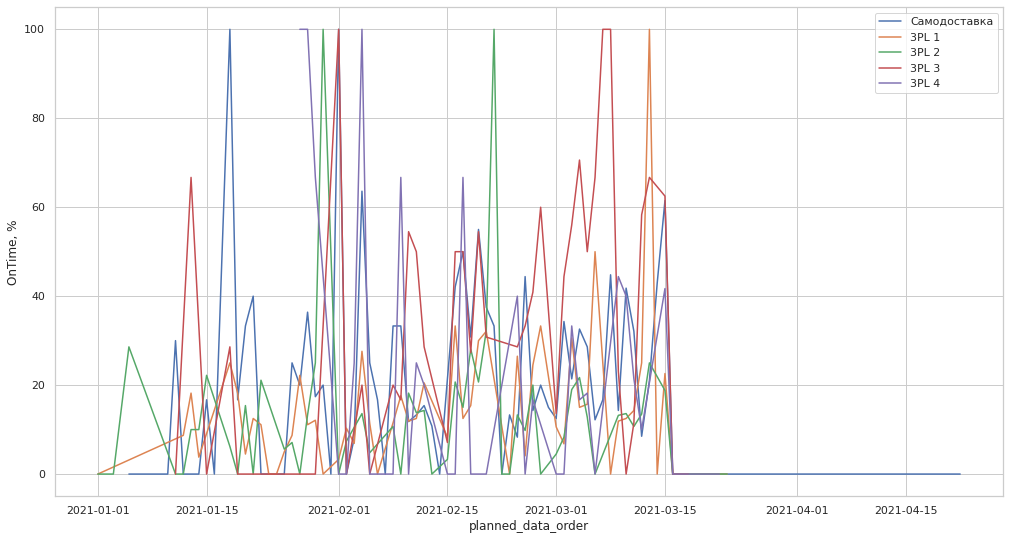

In [55]:
# Построим графики измения OnTime в % по дням для каждого перевозчика
ax = sns.lineplot(data = OnTime_by_carrier, x = 'planned_data_order', y = 'Самодоставка', label = 'Самодоставка')
sns.lineplot(data = OnTime_by_carrier, x = 'planned_data_order', y = '3PL 1', label = '3PL 1')
sns.lineplot(data = OnTime_by_carrier, x = 'planned_data_order', y = '3PL 2', label = '3PL 2')
sns.lineplot(data = OnTime_by_carrier, x = 'planned_data_order', y = '3PL 3', label = '3PL 3')
sns.lineplot(data = OnTime_by_carrier, x = 'planned_data_order', y = '3PL 4', label = '3PL 4')
plt.legend()
ax.set_ylabel('OnTime, %')

Аналогичный код будем использовать для расчета метрики OnTime в других разрезах

In [56]:
# Посчитаем метрику OnTime в разрезе по типу доставки
OnTime_by_delivery = logistics_1.groupby(['planned_data_order', 'delivery_type'], as_index = False)\
    .agg({'number_order':'count','OnTime_delivered' : 'sum'})\
    .rename(columns = {'number_order' : 'total_orders', 'OnTime_delivered' : 'OnTime_orders'})

In [57]:
OnTime_by_delivery['OnTime_percent'] = round(100 * OnTime_by_delivery.OnTime_orders / OnTime_by_delivery.total_orders, 1)

In [58]:
OnTime_by_delivery = OnTime_by_delivery\
    .pivot(index = 'planned_data_order', columns = 'delivery_type', values = 'OnTime_percent')\
    .reset_index()
OnTime_by_delivery

delivery_type,planned_data_order,Курьер,Самовывоз
0,2021-01-01,NaN,0.0
1,2021-01-02,NaN,0.0
2,2021-01-03,NaN,0.0
3,2021-01-05,0.0,28.6
4,2021-01-06,0.0,NaN
...,...,...,...
76,2021-03-21,0.0,NaN
77,2021-03-22,0.0,0.0
78,2021-03-23,NaN,0.0
79,2021-03-24,0.0,NaN


Text(0, 0.5, 'OnTime, %')

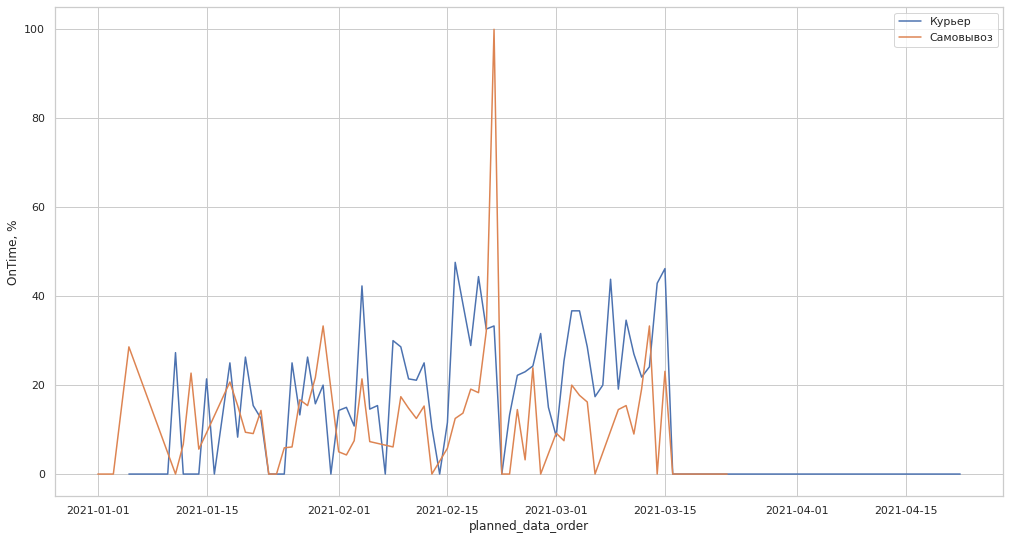

In [59]:
ax = sns.lineplot(data = OnTime_by_delivery, x = 'planned_data_order', y = 'Курьер', label = 'Курьер')
sns.lineplot(data = OnTime_by_delivery, x = 'planned_data_order', y = 'Самовывоз', label = 'Самовывоз')
plt.legend()
ax.set_ylabel('OnTime, %')

In [60]:
# Посчитаем метрику OnTime в разрезе по кластерам склада
OnTime_by_warehouse = logistics_1.groupby(['planned_data_order', 'warehouse_cluster'], as_index = False)\
    .agg({'number_order':'count','OnTime_delivered' : 'sum'})\
    .rename(columns = {'number_order' : 'total_orders', 'OnTime_delivered' : 'OnTime_orders'})

In [61]:
OnTime_by_warehouse['OnTime_percent'] = round(100 * OnTime_by_warehouse.OnTime_orders / OnTime_by_warehouse.total_orders, 1)

In [62]:
OnTime_by_warehouse = OnTime_by_warehouse\
    .pivot(index = 'planned_data_order', columns = 'warehouse_cluster', values = 'OnTime_percent')\
    .reset_index()

In [63]:
OnTime_by_warehouse.head()

warehouse_cluster,planned_data_order,Кластер Екатеринбург,Кластер Казань,Кластер Калининград,Кластер Краснодар,Кластер Москва,Кластер Московская область,Кластер Новосибирск,Кластер Санкт-Петербург,Кластер Северо-Запад,Кластер Хабаровск,Кластер Центр
0,2021-01-01,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-01-02,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-01-03,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-01-05,25.0,NaN,NaN,0.0,0.0,NaN,100.0,NaN,0.0,NaN,NaN
4,2021-01-06,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN


Text(0, 0.5, 'OnTime, %')

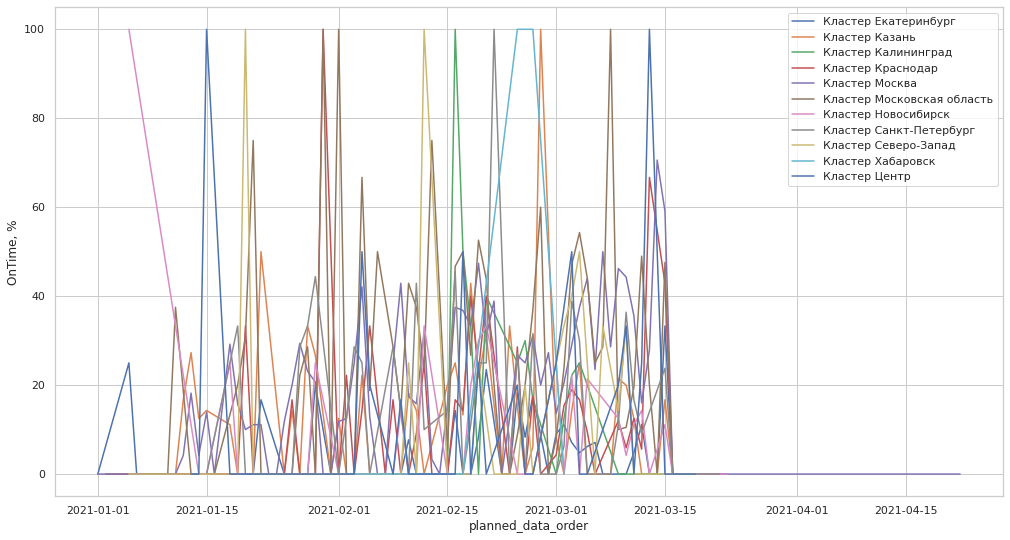

In [64]:
ax = sns.lineplot(data = OnTime_by_warehouse, x = 'planned_data_order', y = 'Кластер Екатеринбург', label = 'Кластер Екатеринбург')
sns.lineplot(data = OnTime_by_warehouse, x = 'planned_data_order', y = 'Кластер Казань', label = 'Кластер Казань')
sns.lineplot(data = OnTime_by_warehouse, x = 'planned_data_order', y = 'Кластер Калининград', label = 'Кластер Калининград')
sns.lineplot(data = OnTime_by_warehouse, x = 'planned_data_order', y = 'Кластер Краснодар', label = 'Кластер Краснодар')
sns.lineplot(data = OnTime_by_warehouse, x = 'planned_data_order', y = 'Кластер Москва', label = 'Кластер Москва')
sns.lineplot(data = OnTime_by_warehouse, x = 'planned_data_order', y = 'Кластер Московская область', label = 'Кластер Московская область')
sns.lineplot(data = OnTime_by_warehouse, x = 'planned_data_order', y = 'Кластер Новосибирск', label = 'Кластер Новосибирск')
sns.lineplot(data = OnTime_by_warehouse, x = 'planned_data_order', y = 'Кластер Санкт-Петербург', label = 'Кластер Санкт-Петербург')
sns.lineplot(data = OnTime_by_warehouse, x = 'planned_data_order', y = 'Кластер Северо-Запад', label = 'Кластер Северо-Запад')
sns.lineplot(data = OnTime_by_warehouse, x = 'planned_data_order', y = 'Кластер Хабаровск', label = 'Кластер Хабаровск')
sns.lineplot(data = OnTime_by_warehouse, x = 'planned_data_order', y = 'Кластер Центр', label = 'Кластер Центр')
plt.legend()
ax.set_ylabel('OnTime, %')

In [65]:
# Посчитаем метрику OnTime в разрезе по таймслотам
OnTime_by_timeslot = logistics_1.groupby(['planned_data_order', 'timeslot_number'], as_index = False)\
    .agg({'number_order':'count','OnTime_delivered' : 'sum'})\
    .rename(columns = {'number_order' : 'total_orders', 'OnTime_delivered' : 'OnTime_orders'})

In [66]:
OnTime_by_timeslot['OnTime_percent'] = round(100 * OnTime_by_timeslot.OnTime_orders / OnTime_by_timeslot.total_orders, 1)

In [67]:
OnTime_by_timeslot = OnTime_by_timeslot\
    .pivot(index = 'planned_data_order', columns = 'timeslot_number', values = 'OnTime_percent')\
    .reset_index()

In [68]:
OnTime_by_timeslot.head()

timeslot_number,planned_data_order,1,2,3,4,5
0,2021-01-01,0.0,NaN,NaN,NaN,NaN
1,2021-01-02,0.0,NaN,NaN,NaN,NaN
2,2021-01-03,0.0,NaN,NaN,NaN,NaN
3,2021-01-05,0.0,40.0,NaN,NaN,NaN
4,2021-01-06,0.0,NaN,NaN,NaN,NaN


Text(0, 0.5, 'OnTime, %')

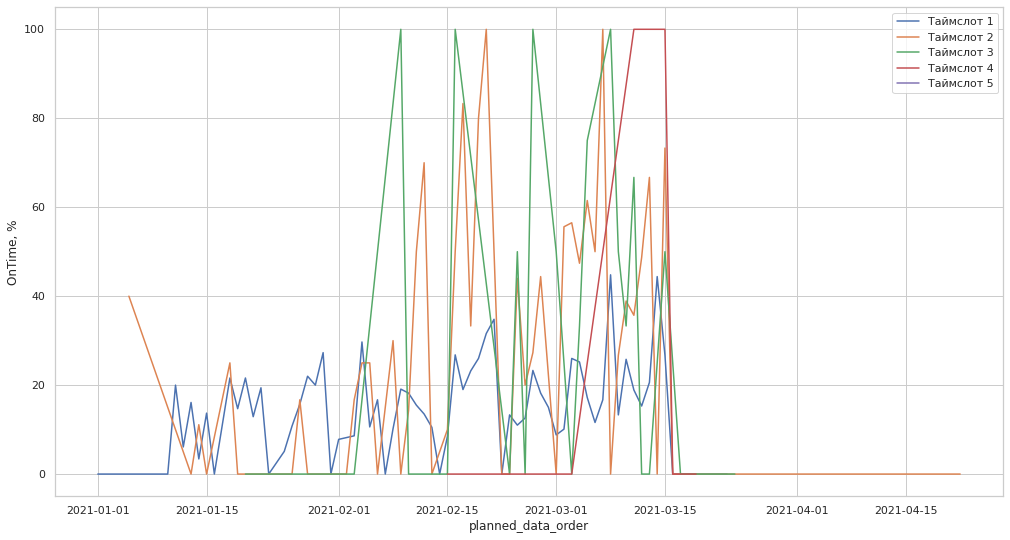

In [69]:
ax = sns.lineplot(data = OnTime_by_timeslot, x = 'planned_data_order', y = 1, label = 'Таймслот 1')
sns.lineplot(data = OnTime_by_timeslot, x = 'planned_data_order', y = 2, label = 'Таймслот 2')
sns.lineplot(data = OnTime_by_timeslot, x = 'planned_data_order', y = 3, label = 'Таймслот 3')
sns.lineplot(data = OnTime_by_timeslot, x = 'planned_data_order', y = 4, label = 'Таймслот 4')
sns.lineplot(data = OnTime_by_timeslot, x = 'planned_data_order', y = 5, label = 'Таймслот 5')
plt.legend()
ax.set_ylabel('OnTime, %')

2. Посчитать PromisedClick2Delivery - метрика обещанного срока доставки (от даты заказа до первой плановой даты доставки), в сутках.

Необходима динамика по дням, неделям, месяцам;

Необходимо сравнение перевозчиков;

Необходимо понимание уровня метрики из кластера в кластер.

In [70]:
# Создадим копию датафрейма, с которой будем работать в этом задании
logistics_2 = logistics.copy(deep=True)

In [71]:
# Для расчета метрики PromisedClick2Delivery нам нужна только первая плановая даты доставки,
#     поэтому отфильтруем датафрейм по таймслоту
logistics_2 = logistics_2.loc[logistics_2['timeslot_number'] == 1]

/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


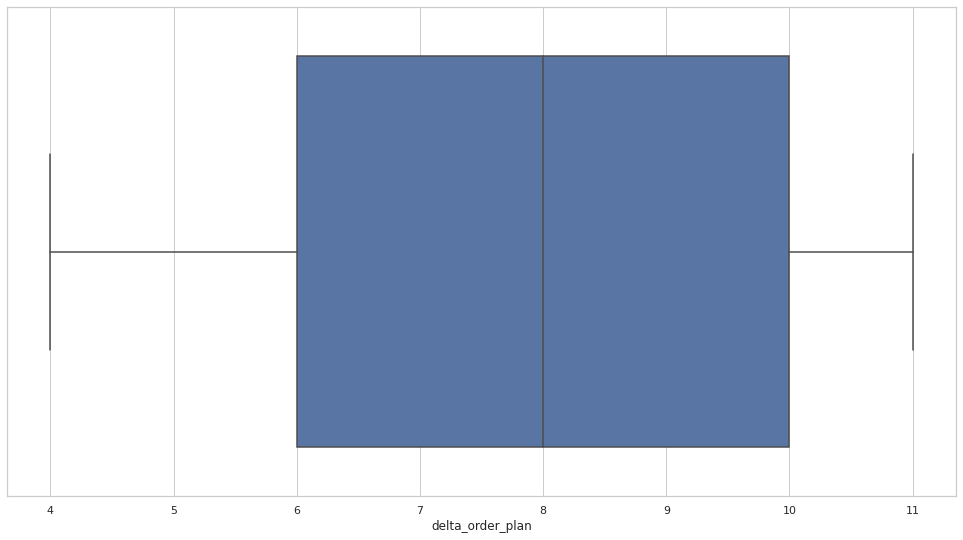

In [72]:
# Посмотрим на распределение значений delta_order_plan (разница между планируемой датой доставки и датой заказа)
sns.boxplot(logistics_2.delta_order_plan)
# Выбросов нет, поэтому мы можем посчитать среднее значение

In [73]:
# Посчитаем метрику PromisedClick2Delivery по дням
PromisedClick2Delivery_metrics = logistics_2.groupby('date_order', as_index = False)\
    .agg({'delta_order_plan' : 'mean'})\
    .rename(columns = {'delta_order_plan' : 'PromisedClick2Delivery'})\
    .round(1)
PromisedClick2Delivery_metrics

,date_order,PromisedClick2Delivery
0,2020-12-21,11.0
1,2020-12-22,11.0
2,2020-12-23,9.0
3,2020-12-24,8.0
4,2020-12-25,9.7
...,...,...
106,2021-04-20,10.0
107,2021-04-21,9.0
108,2021-04-22,4.0
109,2021-04-25,5.0


In [74]:
# Посмотрим на среднее значение метрики PromisedClick2Delivery за весь имеющийся период
PromisedClick2Delivery_metrics_avg = round(PromisedClick2Delivery_metrics.PromisedClick2Delivery.mean(), 1)
PromisedClick2Delivery_metrics_avg

7.7

In [75]:
# Для следующего шага добавим значение среднего в датафрейм с метрикой по дням
PromisedClick2Delivery_metrics['PromisedClick2Delivery_metrics_avg'] = PromisedClick2Delivery_metrics_avg

Text(0, 0.5, 'PromisedClick2Delivery, days')

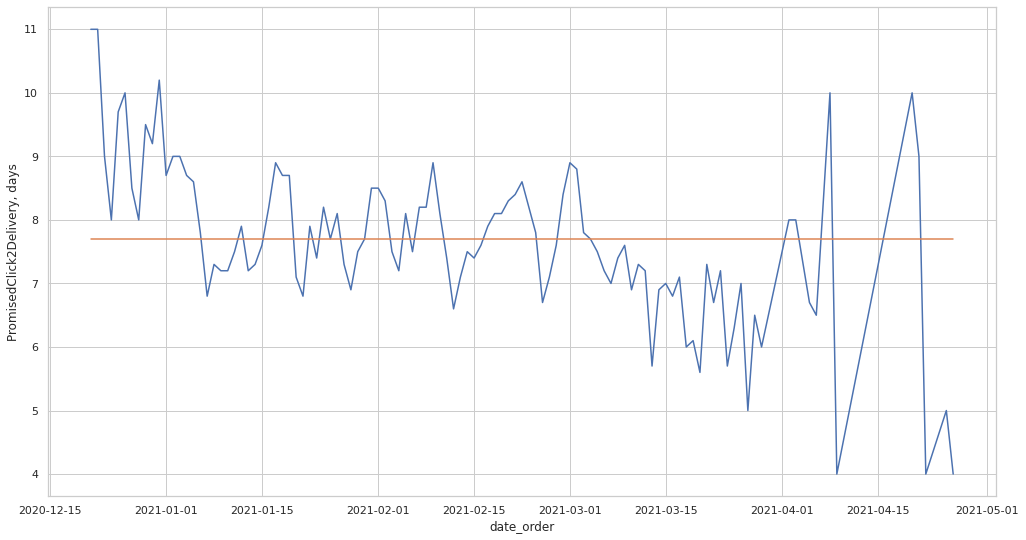

In [76]:
# Построим график измения PromisedClick2Delivery в сутках по дням и линию среднего
ax = sns.lineplot(data = PromisedClick2Delivery_metrics, x = 'date_order', y = 'PromisedClick2Delivery')
sns.lineplot(data = PromisedClick2Delivery_metrics, x = 'date_order', y = 'PromisedClick2Delivery_metrics_avg')
ax.set_ylabel('PromisedClick2Delivery, days')

In [77]:
# Для дальнейших действий переведем столбец с датами заказов в тип datetime
PromisedClick2Delivery_metrics['date_order'] = pd.to_datetime(PromisedClick2Delivery_metrics.date_order)

In [78]:
# Посчитаем метрику PromisedClick2Delivery по неделям
PromisedClick2Delivery_weeks = PromisedClick2Delivery_metrics.resample('W', on = 'date_order').mean().round(1).reset_index()
PromisedClick2Delivery_weeks

,date_order,PromisedClick2Delivery,PromisedClick2Delivery_metrics_avg
0,2020-12-27,9.6,7.7
1,2021-01-03,9.1,7.7
2,2021-01-10,7.7,7.7
3,2021-01-17,7.8,7.7
4,2021-01-24,7.8,7.7
5,2021-01-31,7.7,7.7
6,2021-02-07,7.9,7.7
7,2021-02-14,7.7,7.7
8,2021-02-21,8.0,7.7
9,2021-02-28,7.8,7.7


Text(0, 0.5, 'PromisedClick2Delivery, days')

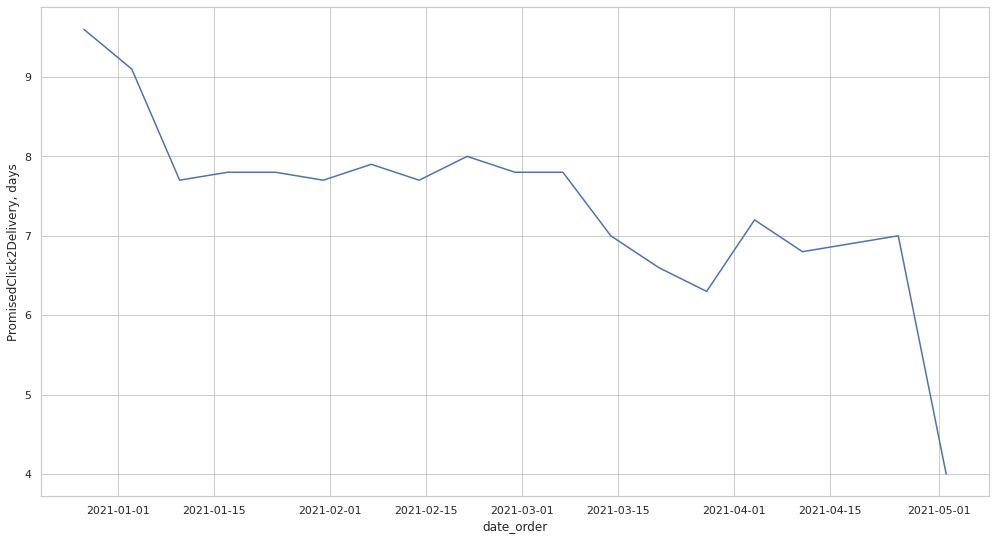

In [79]:
# Построим график измения PromisedClick2Delivery в сутках по неделям
ax = sns.lineplot(data = PromisedClick2Delivery_weeks, x = 'date_order', y = 'PromisedClick2Delivery')
ax.set_ylabel('PromisedClick2Delivery, days')

In [80]:
# Посчитаем метрику PromisedClick2Delivery по месяцам
PromisedClick2Delivery_months = PromisedClick2Delivery_metrics.resample('M', on = 'date_order').mean().round(1).reset_index()
PromisedClick2Delivery_months

,date_order,PromisedClick2Delivery,PromisedClick2Delivery_metrics_avg
0,2020-12-31,9.5,7.7
1,2021-01-31,7.9,7.7
2,2021-02-28,7.8,7.7
3,2021-03-31,6.9,7.7
4,2021-04-30,6.8,7.7


Text(0, 0.5, 'PromisedClick2Delivery, days')

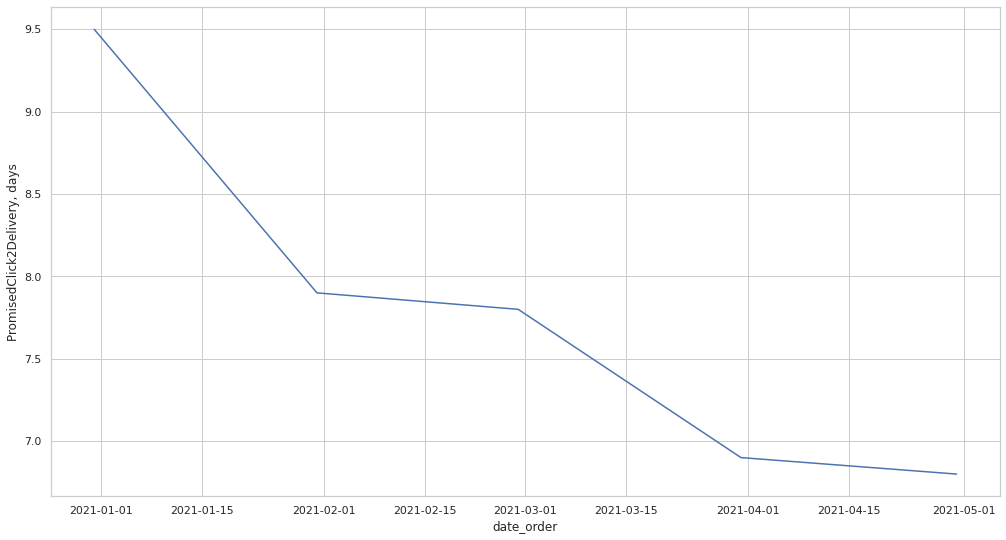

In [81]:
# Построим график измения PromisedClick2Delivery в сутках по месяцам
ax = sns.lineplot(data = PromisedClick2Delivery_months, x = 'date_order', y = 'PromisedClick2Delivery')
ax.set_ylabel('PromisedClick2Delivery, days')

In [82]:
# Посчитаем метрику PromisedClick2Delivery по перевозчикам
PromisedClick2Delivery_carrier = logistics_2.groupby(['date_order', 'carrier_name'], as_index = False)\
    .agg({'delta_order_plan' : 'mean'})\
    .rename(columns = {'delta_order_plan' : 'PromisedClick2Delivery'})

In [83]:
# Развернем таблицу
PromisedClick2Delivery_carrier = PromisedClick2Delivery_carrier\
    .pivot(index = 'date_order', columns = 'carrier_name', values = 'PromisedClick2Delivery')\
    .reset_index()
PromisedClick2Delivery_carrier

carrier_name,date_order,3PL 1,3PL 2,3PL 3,3PL 4,Самодоставка
0,2020-12-21,NaN,11.0,NaN,NaN,NaN
1,2020-12-22,NaN,11.0,NaN,NaN,NaN
2,2020-12-23,9.0,NaN,NaN,NaN,NaN
3,2020-12-24,NaN,8.0,NaN,NaN,NaN
4,2020-12-25,NaN,7.0,NaN,NaN,11.0
...,...,...,...,...,...,...
106,2021-04-20,NaN,NaN,NaN,NaN,10.0
107,2021-04-21,NaN,NaN,NaN,NaN,9.0
108,2021-04-22,NaN,NaN,NaN,NaN,4.0
109,2021-04-25,NaN,NaN,NaN,NaN,5.0


Text(0, 0.5, 'PromisedClick2Delivery, days')

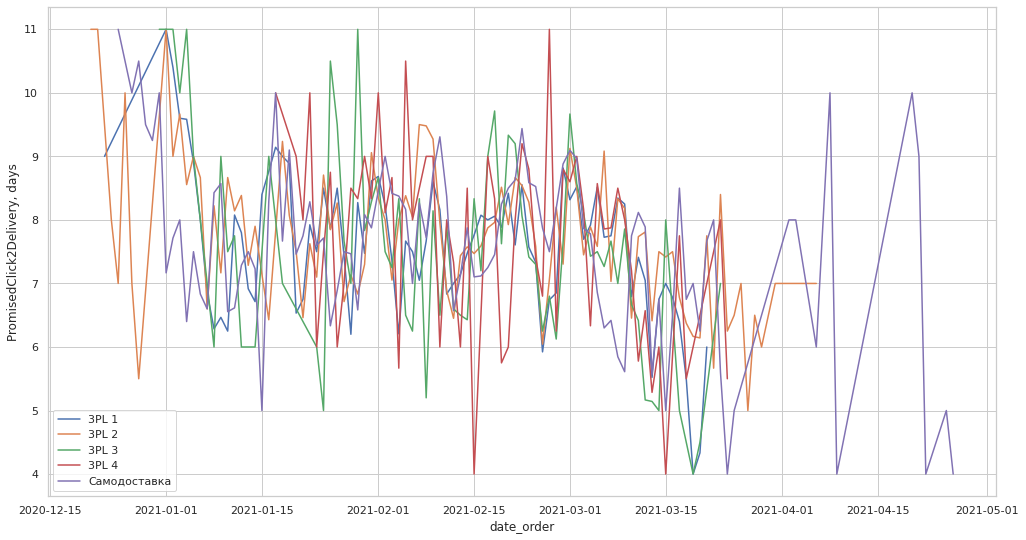

In [84]:
# Построим график измения PromisedClick2Delivery в разрезе по перевозчикам
ax = sns.lineplot(data = PromisedClick2Delivery_carrier, x = 'date_order', y = '3PL 1', label = '3PL 1')
sns.lineplot(data = PromisedClick2Delivery_carrier, x = 'date_order', y = '3PL 2', label = '3PL 2')
sns.lineplot(data = PromisedClick2Delivery_carrier, x = 'date_order', y = '3PL 3', label = '3PL 3')
sns.lineplot(data = PromisedClick2Delivery_carrier, x = 'date_order', y = '3PL 4', label = '3PL 4')
sns.lineplot(data = PromisedClick2Delivery_carrier, x = 'date_order', y = 'Самодоставка', label = 'Самодоставка')
plt.legend()
ax.set_ylabel('PromisedClick2Delivery, days')

In [85]:
# Посчитаем метрику PromisedClick2Delivery из кластера в кластер, в сутках
PromisedClick2Delivery_clusters = logistics_2.groupby(['customer_cluster', 'warehouse_cluster'], as_index = False)\
    .agg({'delta_order_plan' : 'mean'})\
    .rename(columns = {'delta_order_plan' : 'PromisedClick2Delivery'})\
    .round(1)

In [86]:
# Развернем таблицу
PromisedClick2Delivery_clusters = PromisedClick2Delivery_clusters\
    .pivot(index = 'customer_cluster', columns = 'warehouse_cluster', values = 'PromisedClick2Delivery')
PromisedClick2Delivery_clusters

warehouse_cluster,Кластер Екатеринбург,Кластер Казань,Кластер Калининград,Кластер Краснодар,Кластер Москва,Кластер Московская область,Кластер Новосибирск,Кластер Санкт-Петербург,Кластер Северо-Запад,Кластер Хабаровск,Кластер Центр
customer_cluster,,,,,,,,,,,
Кластер Екатеринбург,9.2,7.7,6.6,7.7,7.3,7.9,7.8,7.4,7.1,NaN,7.7
Кластер Казань,7.9,7.8,8.3,7.7,7.8,7.6,8.5,7.5,7.8,NaN,7.6
Кластер Калининград,7.5,9.7,NaN,8.0,6.4,8.0,5.0,7.5,7.7,NaN,NaN
Кластер Краснодар,7.8,8.2,6.2,7.5,7.6,7.3,8.6,8.0,7.4,NaN,7.8
Кластер Москва,7.5,7.4,7.6,7.5,7.5,7.6,7.7,7.7,7.1,6.0,8.1
Кластер Московская область,7.4,7.5,7.9,7.6,7.6,7.6,8.0,7.4,7.1,6.0,8.2
Кластер Новосибирск,8.0,7.7,9.8,7.2,8.2,7.5,7.7,8.5,8.2,7.0,9.2
Кластер Санкт-Петербург,7.2,7.3,8.0,7.7,7.3,7.4,8.8,7.7,7.9,NaN,7.2
Кластер Северо-Запад,7.8,8.3,6.8,7.7,7.9,7.7,9.0,6.8,8.7,NaN,8.3


Text(0.5, 1.0, 'PromisedClick2Delivery, days')

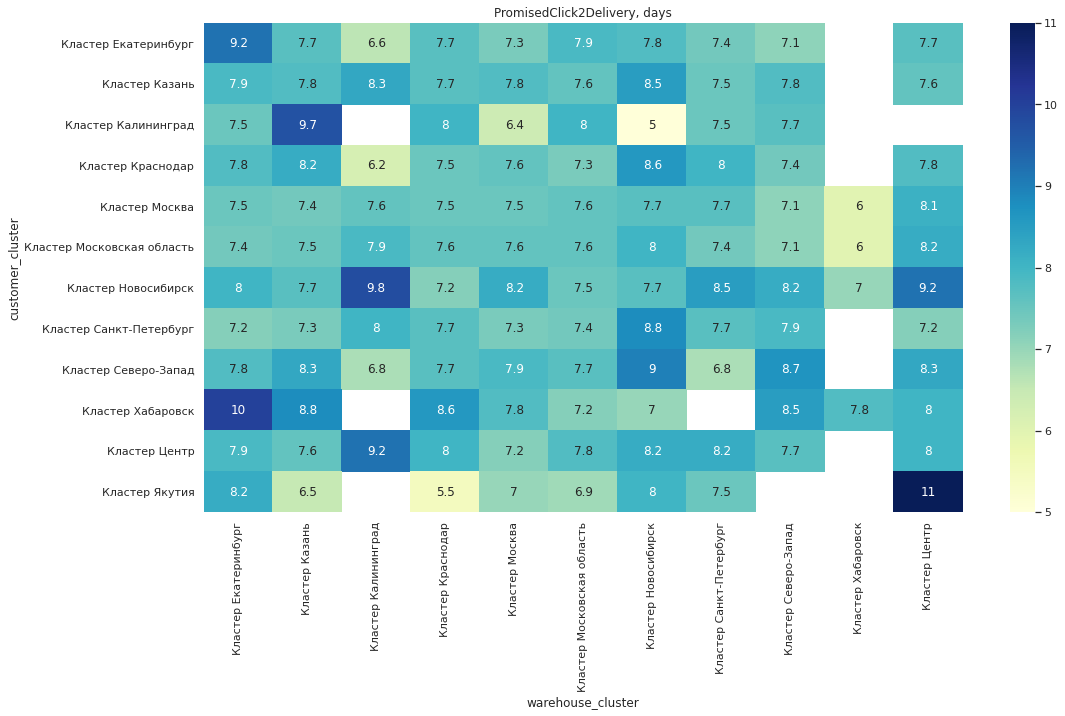

In [87]:
# Построим тепловую карту PromisedClick2Delivery по кластерам
ax = sns.heatmap(PromisedClick2Delivery_clusters, annot=True, cmap="YlGnBu")
ax.set_title('PromisedClick2Delivery, days')

3. Посчитать Click2Delivery - метрика фактического срока доставки (от даты заказа до момента вручения), в сутках.

Необходимо сравнение с метрикой PromisedClick2Delivery;

Необходимо понимание кластеров, где заказы доставляются быстрее, чем мы обещаем клиентам;

In [88]:
# Создадим копию датафрейма, с которой будем работать в этом задании
logistics_3 = logistics.copy(deep=True)

In [89]:
# Отфильтруем датафрейм: оставим только доставленные заказы и уберем даты заказов, которыми мы заполняли пустые значения
logistics_3 = logistics_3.loc[logistics_3.order_status == "Доставлен"]
logistics_3 = logistics_3.loc[logistics_3.date_order > pd.to_datetime("1970-01-01")]

/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


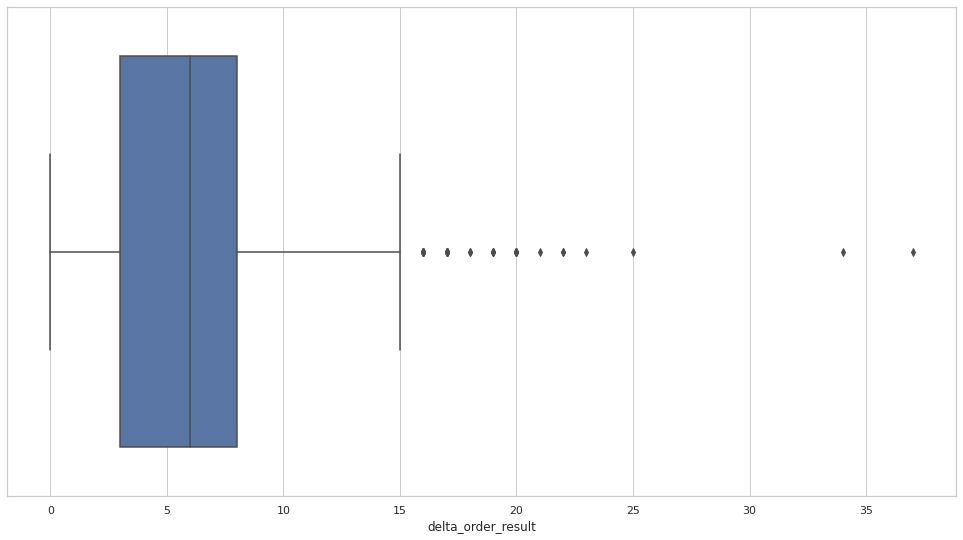

In [90]:
# Посмотрим на распределение значений delta_order_result (разница между фактической датой доставки и датой заказа)
sns.boxplot(logistics_3.delta_order_result)
# Выбросы есть, поэтому будем использовать не среднее, а медиану

In [91]:
# Рассчитаем метрику Click2Delivery по дням, в сутках
Click2Delivery_metrics = logistics_3.groupby('date_order', as_index = False)\
    .agg({'delta_order_result' : 'median'})\
    .rename(columns = {'delta_order_result' : 'Click2Delivery'})
Click2Delivery_metrics

,date_order,Click2Delivery
0,2020-12-21,4.0
1,2020-12-22,14.0
2,2020-12-23,6.0
3,2020-12-24,11.0
4,2020-12-25,5.0
...,...,...
80,2021-03-11,2.0
81,2021-03-12,1.0
82,2021-03-13,1.0
83,2021-03-14,1.0


In [92]:
# Посчитаем медианное значение метрики Click2Delivery за весь имеющийся период
Click2Delivery_median = logistics_3.delta_order_result.median()
Click2Delivery_median

6.0

In [93]:
# Для следующего шага добавим значение медианы в датафрейм с метрикой по дням
Click2Delivery_metrics['Click2Delivery_median'] = Click2Delivery_median

Text(0, 0.5, 'Click2Delivery, days')

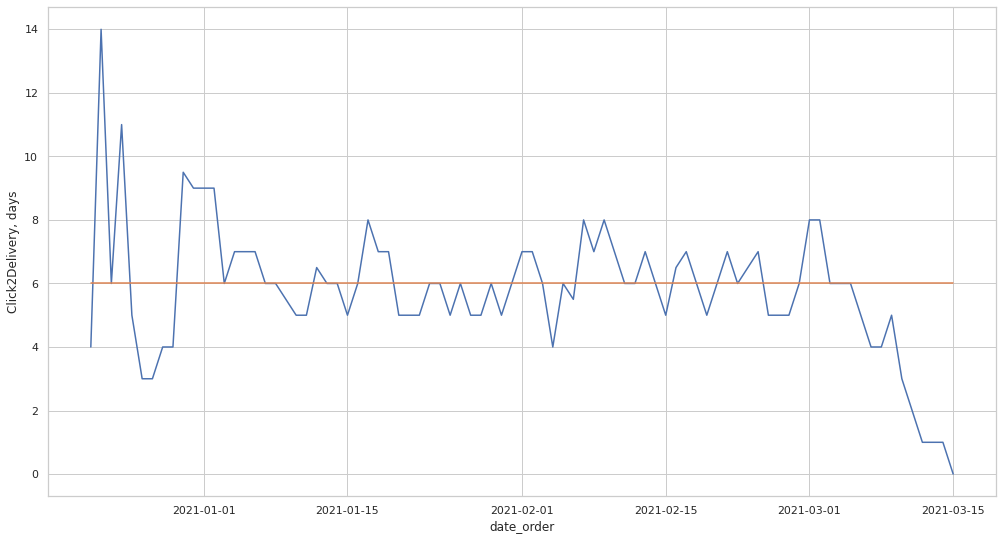

In [94]:
# Построим график измения метрики Click2Delivery и линию медианы
ax = sns.lineplot(data = Click2Delivery_metrics, x = 'date_order', y = 'Click2Delivery')
sns.lineplot(data = Click2Delivery_metrics, x = 'date_order', y = 'Click2Delivery_median')
ax.set_ylabel('Click2Delivery, days')

In [95]:
# Сравним между собой метрики Click2Delivery и PromisedClick2Delivery.
#     Для этого посчитаем медианное значение метрики PromisedClick2Delivery по дням
PromisedClick2Delivery_median = logistics_3.groupby('date_order', as_index = False)\
    .agg({'delta_order_plan' : 'median'})\
    .rename(columns = {'delta_order_plan' : 'PromisedClick2Delivery'})
PromisedClick2Delivery_median

,date_order,PromisedClick2Delivery
0,2020-12-21,11.0
1,2020-12-22,11.0
2,2020-12-23,9.0
3,2020-12-24,8.0
4,2020-12-25,11.0
...,...,...
80,2021-03-11,6.0
81,2021-03-12,5.0
82,2021-03-13,5.0
83,2021-03-14,5.0


In [96]:
# Объединим датафреймы с обеими метриками
Click2Delivery_PromisedClick2Delivery = Click2Delivery_metrics\
    .merge(PromisedClick2Delivery_median, how = 'left', on = 'date_order')

In [97]:
# В столбце Diff посчитаем разницу между 2 метриками (насколько фактический срок доставки оказался больше или меньше обещанного)
Click2Delivery_PromisedClick2Delivery['Diff'] = Click2Delivery_PromisedClick2Delivery.Click2Delivery\
    - Click2Delivery_PromisedClick2Delivery.PromisedClick2Delivery
Click2Delivery_PromisedClick2Delivery

,date_order,Click2Delivery,Click2Delivery_median,PromisedClick2Delivery,Diff
0,2020-12-21,4.0,6.0,11.0,-7.0
1,2020-12-22,14.0,6.0,11.0,3.0
2,2020-12-23,6.0,6.0,9.0,-3.0
3,2020-12-24,11.0,6.0,8.0,3.0
4,2020-12-25,5.0,6.0,11.0,-6.0
...,...,...,...,...,...
80,2021-03-11,2.0,6.0,6.0,-4.0
81,2021-03-12,1.0,6.0,5.0,-4.0
82,2021-03-13,1.0,6.0,5.0,-4.0
83,2021-03-14,1.0,6.0,5.0,-4.0


In [98]:
# Посчитаем среднюю разницу между 2 метриками за весь период
Click2Delivery_PromisedClick2Delivery_avg = Click2Delivery_PromisedClick2Delivery.Diff.mean().round(1)
Click2Delivery_PromisedClick2Delivery_avg
# В среднем заказы доставляются на 2.1 дня быстрее, чем обещано

-2.1

In [99]:
# Для следующего шага добавим значение среднего в датафрейм с разницей между метриками по дням
Click2Delivery_PromisedClick2Delivery['Click2Delivery_PromisedClick2Delivery_avg'] = Click2Delivery_PromisedClick2Delivery_avg

Text(0, 0.5, 'Click2Delivery_PromisedClick2Delivery, days')

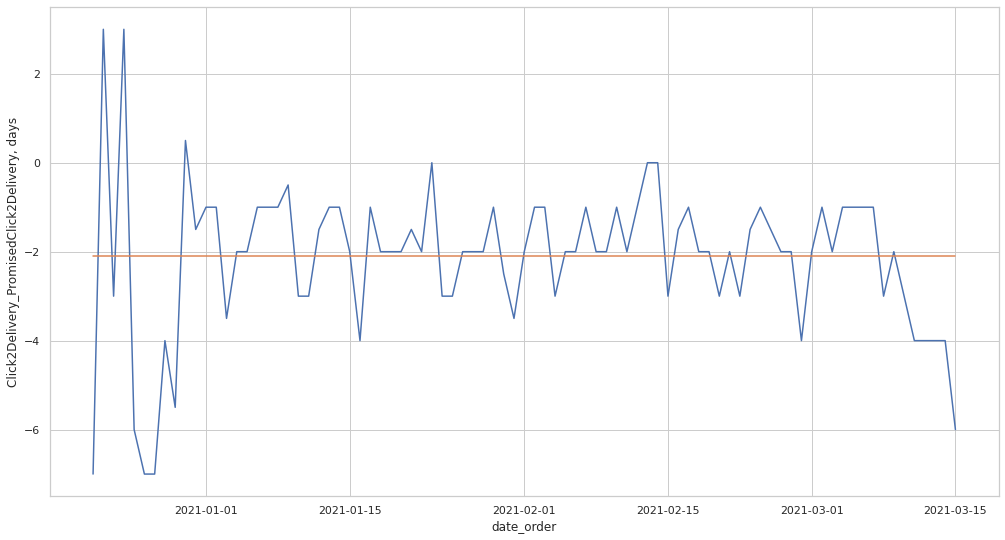

In [100]:
# Построим график измения разницы между метриками и линию среднего
ax = sns.lineplot(data = Click2Delivery_PromisedClick2Delivery, x = 'date_order', y = 'Diff')
sns.lineplot(data = Click2Delivery_PromisedClick2Delivery, x = 'date_order', y = 'Click2Delivery_PromisedClick2Delivery_avg')
ax.set_ylabel('Click2Delivery_PromisedClick2Delivery, days')

In [101]:
# Посмотрим кластеры клиентов, где заказы доставляются быстрее, чем обещано
Click2Delivery_clusters = logistics_3.query('delta_plan_result < 0')\
    .groupby('customer_cluster', as_index = False)\
    .agg({'delta_plan_result' : 'median'})\
    .rename(columns = {'delta_plan_result' : 'days_faster_delivered'})\
    .sort_values('days_faster_delivered')\
    .reset_index()
Click2Delivery_clusters
# Во всех 12 кластерах заказы доставляются быстрее обещанного срока

,index,customer_cluster,days_faster_delivered
0,11,Кластер Якутия,-5
1,0,Кластер Екатеринбург,-4
2,8,Кластер Северо-Запад,-4
3,1,Кластер Казань,-3
4,2,Кластер Калининград,-3
5,3,Кластер Краснодар,-3
6,6,Кластер Новосибирск,-3
7,7,Кластер Санкт-Петербург,-3
8,9,Кластер Хабаровск,-3
9,10,Кластер Центр,-3


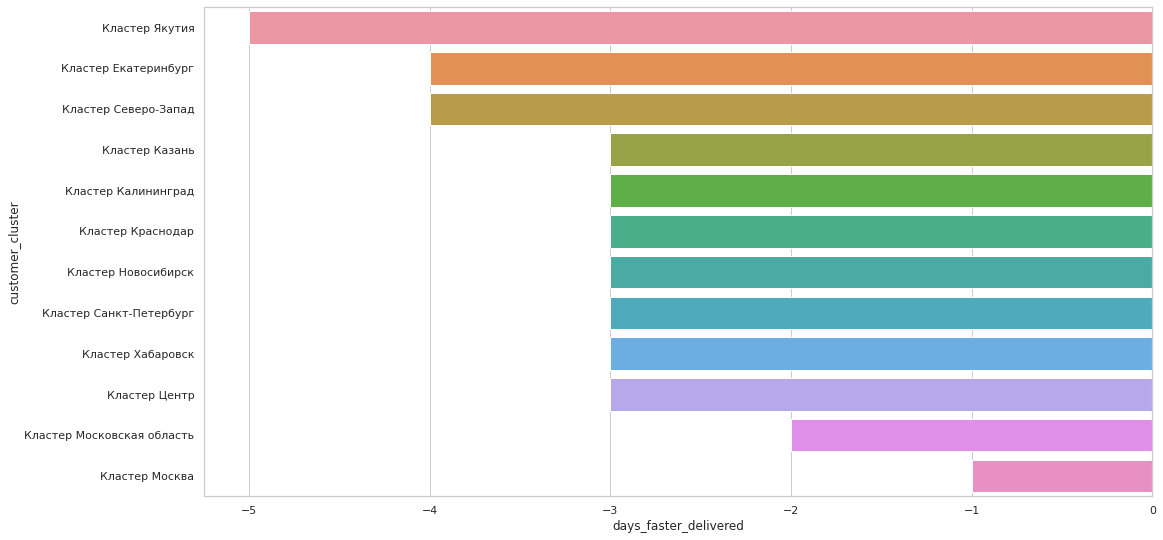

In [102]:
# Построим визуализацию
sns.barplot(data = Click2Delivery_clusters, y = 'customer_cluster', x = 'days_faster_delivered')

4. Посчитать GMV Accepted - метрика совокупного объема продаж (считается по заказам, оформленным в указанный день), в рублях.

Необходимо видеть изменение метрики по дням;

Необходимы разрезы по перевозчикам, по типу доставки, по кластерам склада;

In [103]:
# Таблица product_online содержит данные о товарах в заказе, загрузим её в датафрейм product
product = pd.read_csv('https://drive.google.com/uc?export=download&id=1uQu_gS-k1rVS_WN6kaOhRbPJREUxR8pT')

In [104]:
# Посмотрим на данные
product.head()
# number_order - уникальный номер заказа клиента 
#     (в столбце номер может повторяться, т.к. так как в одном заказе может быть несколько товаров)
# product_ID - уникальный номер товара 
#     (В столбце номер может повторяться, т.к. так как один товар может быть в заказах нескольких клиентов)
# product_price - стоимость одной единицы товара в рублях
# amount - количество единиц товара в заказе

,number_order,product_ID,product_price,amount
0,313655114,983587801,5512.44,1
1,313655114,983587158,4070.35,2
2,313655114,983582669,3591.97,1
3,315229153,983589424,4433.23,3
4,315229153,983587827,2862.50,2


In [105]:
# Посмотрим размер датафрейма
product.shape

(12233, 4)

In [106]:
# Посчитаем количество уникальных значений в каждом столбце
product.nunique()

number_order     5976
product_ID       7057
product_price    7031
amount              4
dtype: int64

In [107]:
# Посчитаем количество пропущенных значений в каждом столбце
product.isna().sum()
# Их нет

number_order     0
product_ID       0
product_price    0
amount           0
dtype: int64

In [108]:
# Посмотрим на типы данных
product.dtypes
# Всё верно

number_order       int64
product_ID         int64
product_price    float64
amount             int64
dtype: object

In [109]:
# Создадим копию датафрейма с данными о товарах, с которой будем работать в этом задании
product_1 = product.copy(deep = True)

In [110]:
# Добавим столбец total_price с суммарной ценой заказанного количества товара
product_1['total_price'] = product_1.product_price * product_1.amount

In [111]:
# Посчитаем общую сумму каждого заказа
orders = product_1.groupby('number_order', as_index = False)\
    .agg({'total_price' : 'sum'})

In [112]:
# Создадим копию датафрейма с данными о логистике, с которой будем работать в этом задании
logistics_4 = logistics.copy(deep = True)

In [113]:
# Оставим только первые записи о каждом заказе
logistics_4 = logistics_4.loc[logistics.timeslot_number == 1]

In [114]:
# Объединим датафреймы с данными о логистике и товарах в task_4
task_4 = orders.merge(logistics_4, how = 'right', on = 'number_order')

In [115]:
# Посмотрим на получившийся датафрейм
task_4.head()

,number_order,total_price,date_order,planned_data_order,timeslot_number,result_data_order,delivery_type,carrier_name,seller_ID,order_status,customer_cluster,warehouse_cluster,delta_order_plan,delta_order_result,delta_plan_result
0,313655114,17245.11,2021-01-05,2021-01-14,1,2021-01-11,Самовывоз,3PL 1,301202,Доставлен,Кластер Краснодар,Кластер Москва,9,6,-3
1,315229153,19024.69,2021-01-03,2021-01-11,1,2021-01-08,Курьер,Самодоставка,40560,Доставлен,Кластер Московская область,Кластер Московская область,8,5,-3
2,3114106095,45515.87,2021-01-08,2021-01-16,1,2021-01-14,Курьер,Самодоставка,40560,Доставлен,Кластер Московская область,Кластер Московская область,8,6,-2
3,31145541407,33376.42,2021-01-12,2021-01-20,1,2021-01-15,Самовывоз,3PL 1,301202,Доставлен,Кластер Санкт-Петербург,Кластер Москва,8,3,-5
4,325050136,25225.47,2021-01-16,2021-01-26,1,2021-01-25,Самовывоз,3PL 1,946233,Доставлен,Кластер Санкт-Петербург,Кластер Санкт-Петербург,10,9,-1


In [116]:
# Посчитаем сумму всех заказов по дням
GMV_metrics = task_4.groupby('date_order', as_index = False)\
    .agg({'total_price' : 'sum'})

In [117]:
# Посчитаем метрику GMV
GMV_metrics['GMV'] = round(GMV_metrics.total_price.cumsum(), 1)

In [118]:
# Для следующего шага переведем столбец date_order в формат datetime
GMV_metrics['date_order'] = pd.to_datetime(GMV_metrics['date_order'])

In [119]:
# Создадим столбец date, который будет на 1 день опережать столбец date_order 
#     (ведь для метрики GMV нужна сумма всех заказов ДО текущего дня)
GMV_metrics['date'] = GMV_metrics.date_order + dt.timedelta(days=1)

In [120]:
# Оставим только нужные столбцы
GMV_metrics = GMV_metrics.filter(items = ['date', 'GMV'])

In [121]:
# Посмотрим на значение метрики GMV по дням
GMV_metrics

,date,GMV
0,2020-12-22,24288.7
1,2020-12-23,36397.2
2,2020-12-24,40704.3
3,2020-12-25,73652.8
4,2020-12-26,151022.2
...,...,...
106,2021-04-21,100334877.0
107,2021-04-22,100336744.9
108,2021-04-23,100352389.7
109,2021-04-26,100358207.6


Text(0, 0.5, 'GMV, 100 mln rub')

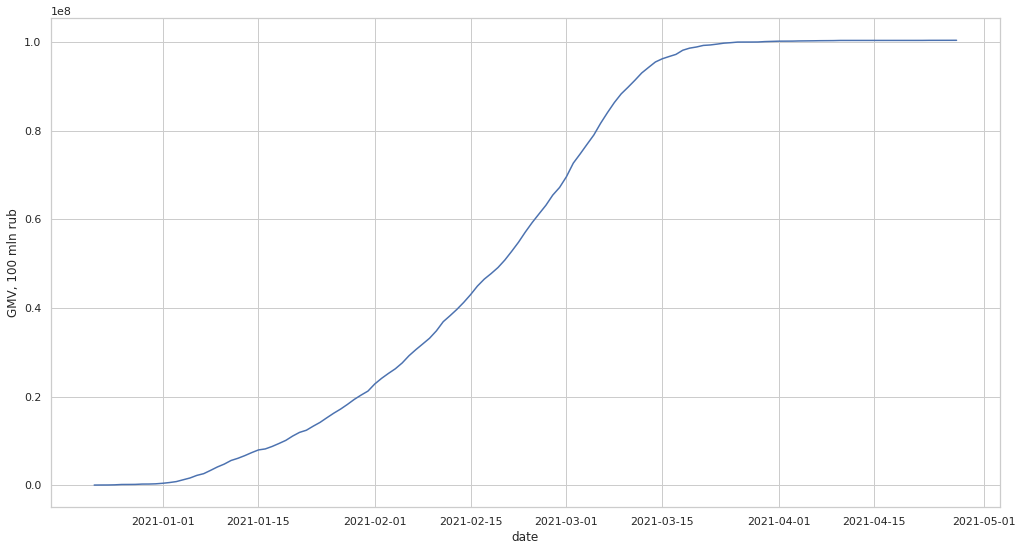

In [122]:
# Построим визуализацию метрики GMV
ax = sns.lineplot(data = GMV_metrics, x = 'date', y = 'GMV')
ax.set_ylabel('GMV, 100 mln rub')

In [123]:
# Начнем считать метрику GMV в разрезе по перевозчикам
GMV_carriers = task_4.groupby(['date_order', 'carrier_name'], as_index = False)\
    .agg({'total_price' : 'sum'})

In [124]:
# Развернем таблицу
GMV_carriers = GMV_carriers\
    .pivot(index = 'date_order', columns = 'carrier_name', values = 'total_price')\
    .reset_index()

In [125]:
# Заполним пропуски
GMV_carriers = GMV_carriers.fillna(0)

In [126]:
# Посчитаем GMV для каждого перевозчика
GMV_carriers['3PL_1_GMV'] = GMV_carriers['3PL 1'].cumsum()
GMV_carriers['3PL_2_GMV'] = GMV_carriers['3PL 2'].cumsum()
GMV_carriers['3PL_3_GMV'] = GMV_carriers['3PL 3'].cumsum()
GMV_carriers['3PL_4_GMV'] = GMV_carriers['3PL 4'].cumsum()
GMV_carriers['Selfdelivery_GMV'] = GMV_carriers['Самодоставка'].cumsum()

In [127]:
# Для следующего шага переведем столбец date_order в формат datetime
GMV_carriers['date_order'] = pd.to_datetime(GMV_carriers['date_order'])

In [128]:
# Создадим столбец date, который будет на 1 день опережать столбец date_order 
GMV_carriers['date'] = GMV_carriers.date_order + dt.timedelta(days=1)

In [129]:
# Оставим только нужные столбцы
GMV_carriers = GMV_carriers.filter(items = ['date', '3PL_1_GMV', '3PL_2_GMV', '3PL_3_GMV', '3PL_4_GMV', 'Selfdelivery_GMV'])

In [130]:
# Посмотрим на метрику GMV по перевозчикам
GMV_carriers

carrier_name,date,3PL_1_GMV,3PL_2_GMV,3PL_3_GMV,3PL_4_GMV,Selfdelivery_GMV
0,2020-12-22,0.00,24288.67,0.00,0.00,0.00
1,2020-12-23,0.00,36397.17,0.00,0.00,0.00
2,2020-12-24,4307.10,36397.17,0.00,0.00,0.00
3,2020-12-25,4307.10,69345.69,0.00,0.00,0.00
4,2020-12-26,4307.10,94278.63,0.00,0.00,52436.52
...,...,...,...,...,...,...
106,2021-04-21,31185867.53,28034182.64,7321401.66,4427164.06,29366261.06
107,2021-04-22,31185867.53,28034182.64,7321401.66,4427164.06,29368129.04
108,2021-04-23,31185867.53,28034182.64,7321401.66,4427164.06,29383773.77
109,2021-04-26,31185867.53,28034182.64,7321401.66,4427164.06,29389591.71


Text(0, 0.5, 'GMV, 10 mln rub')

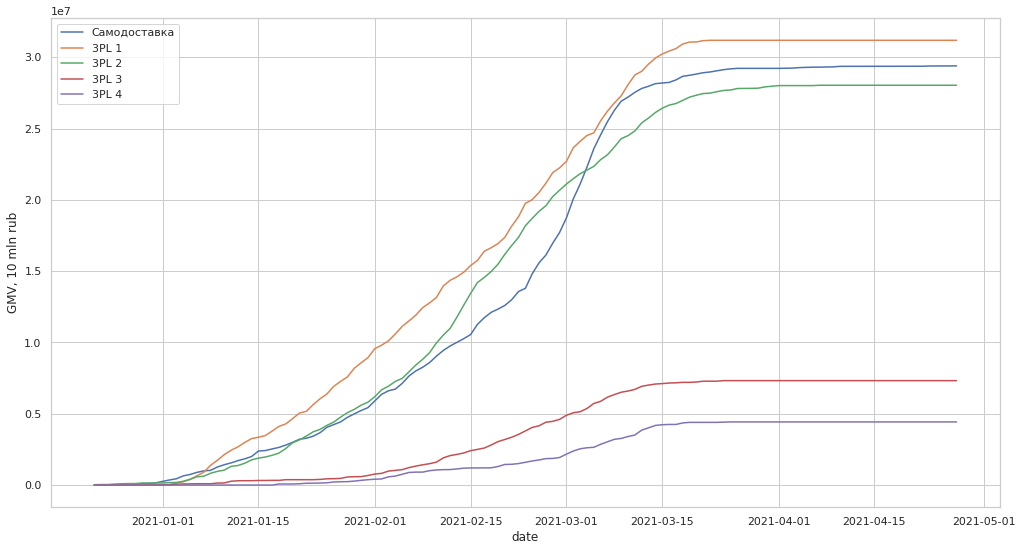

In [131]:
# Построим графики метрики GMV по перевозчикам
ax = sns.lineplot(data = GMV_carriers, x = 'date', y = 'Selfdelivery_GMV', label = 'Самодоставка')
sns.lineplot(data = GMV_carriers, x = 'date', y = '3PL_1_GMV', label = '3PL 1')
sns.lineplot(data = GMV_carriers, x = 'date', y = '3PL_2_GMV', label = '3PL 2')
sns.lineplot(data = GMV_carriers, x = 'date', y = '3PL_3_GMV', label = '3PL 3')
sns.lineplot(data = GMV_carriers, x = 'date', y = '3PL_4_GMV', label = '3PL 4')
plt.legend()
ax.set_ylabel('GMV, 10 mln rub')

Аналогичный код будем использовать для расчета метрики GMV в других разрезах

In [132]:
# Посчитаем метрику GMV в разрезе по типу доставки
GMV_delivery = task_4.groupby(['date_order', 'delivery_type'], as_index = False)\
    .agg({'total_price' : 'sum'})

In [133]:
GMV_delivery = GMV_delivery.pivot(index = 'date_order', columns = 'delivery_type', values = 'total_price').reset_index()

In [134]:
GMV_delivery = GMV_delivery.fillna(0)

In [135]:
GMV_delivery['Courier_GMV'] = GMV_delivery['Курьер'].cumsum()
GMV_delivery['SelfPickup_GMV'] = GMV_delivery['Самовывоз'].cumsum()

In [136]:
GMV_delivery['date_order'] = pd.to_datetime(GMV_delivery['date_order'])

In [137]:
GMV_delivery['date'] = GMV_delivery.date_order + dt.timedelta(days=1)

In [138]:
GMV_delivery = GMV_delivery.filter(items = ['date', 'Courier_GMV', 'SelfPickup_GMV'])
GMV_delivery

delivery_type,date,Courier_GMV,SelfPickup_GMV
0,2020-12-22,0.00,24288.67
1,2020-12-23,0.00,36397.17
2,2020-12-24,0.00,40704.27
3,2020-12-25,0.00,73652.79
4,2020-12-26,52436.52,98585.73
...,...,...,...
106,2021-04-21,52608507.62,47726369.33
107,2021-04-22,52610375.60,47726369.33
108,2021-04-23,52626020.33,47726369.33
109,2021-04-26,52631838.27,47726369.33


Text(0, 0.5, 'GMV, 10 mln rub')

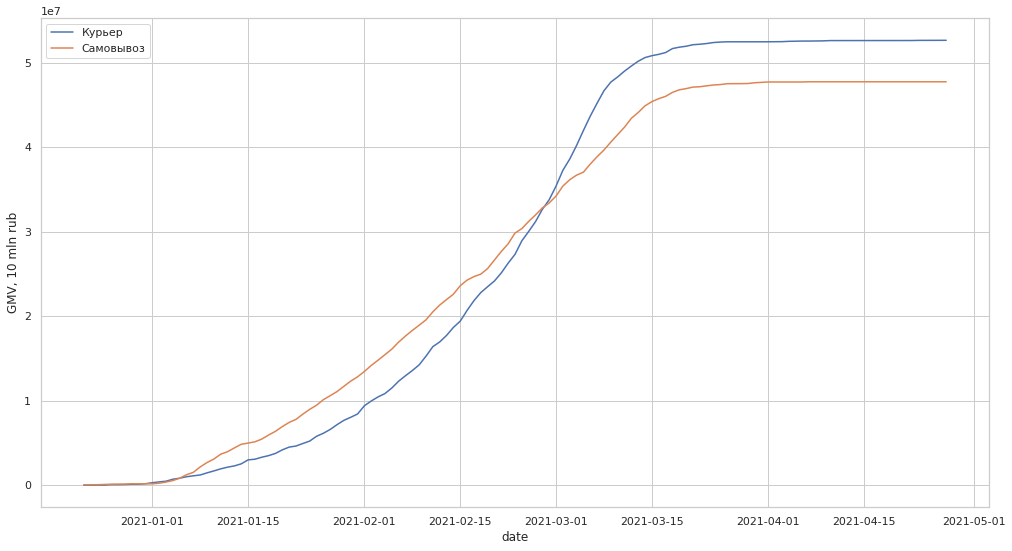

In [139]:
ax = sns.lineplot(data = GMV_delivery, x = 'date', y = 'Courier_GMV', label = 'Курьер')
sns.lineplot(data = GMV_delivery, x = 'date', y = 'SelfPickup_GMV', label = 'Самовывоз')
plt.legend()
ax.set_ylabel('GMV, 10 mln rub')

In [140]:
# Посчитаем метрику GMV в разрезе по кластерам склада
GMV_warehouse = task_4.groupby(['date_order', 'warehouse_cluster'], as_index = False)\
    .agg({'total_price' : 'sum'})

In [141]:
GMV_warehouse = GMV_warehouse.pivot(index = 'date_order', columns = 'warehouse_cluster', values = 'total_price').reset_index()

In [142]:
GMV_warehouse = GMV_warehouse.fillna(0)

In [143]:
GMV_warehouse['Ekaterinburg_GMV'] = GMV_warehouse['Кластер Екатеринбург'].cumsum()
GMV_warehouse['Kazan_GMV'] = GMV_warehouse['Кластер Казань'].cumsum()
GMV_warehouse['Kaliningrad_GMV'] = GMV_warehouse['Кластер Калининград'].cumsum()
GMV_warehouse['Krasnodar_GMV'] = GMV_warehouse['Кластер Краснодар'].cumsum()
GMV_warehouse['Moscow_GMV'] = GMV_warehouse['Кластер Москва'].cumsum()
GMV_warehouse['MoscowRegion_GMV'] = GMV_warehouse['Кластер Московская область'].cumsum()
GMV_warehouse['Novosibirsk_GMV'] = GMV_warehouse['Кластер Новосибирск'].cumsum()
GMV_warehouse['SaintPetersburg_GMV'] = GMV_warehouse['Кластер Санкт-Петербург'].cumsum()
GMV_warehouse['Northwest_GMV'] = GMV_warehouse['Кластер Северо-Запад'].cumsum()
GMV_warehouse['Khabarovsk_GMV'] = GMV_warehouse['Кластер Хабаровск'].cumsum()
GMV_warehouse['Centre_GMV'] = GMV_warehouse['Кластер Центр'].cumsum()

In [144]:
GMV_warehouse['date_order'] = pd.to_datetime(GMV_warehouse['date_order'])

In [145]:
GMV_warehouse['date'] = GMV_warehouse.date_order + dt.timedelta(days=1)

In [146]:
GMV_warehouse = GMV_warehouse\
    .filter(items = ['date', 'Ekaterinburg_GMV', 'Kazan_GMV', 'Kaliningrad_GMV', 'Krasnodar_GMV', 'Moscow_GMV', \
                     'MoscowRegion_GMV', 'Novosibirsk_GMV', 'SaintPetersburg_GMV', 'Northwest_GMV', 'Khabarovsk_GMV', \
                     'Centre_GMV'])
GMV_warehouse

warehouse_cluster,date,Ekaterinburg_GMV,Kazan_GMV,Kaliningrad_GMV,Krasnodar_GMV,Moscow_GMV,MoscowRegion_GMV,Novosibirsk_GMV,SaintPetersburg_GMV,Northwest_GMV,Khabarovsk_GMV,Centre_GMV
0,2020-12-22,0.00,0.0,0.00,0.00,24288.67,0.00,0.0,0.00,0.00,0.00,0.00
1,2020-12-23,0.00,0.0,0.00,12108.50,24288.67,0.00,0.0,0.00,0.00,0.00,0.00
2,2020-12-24,0.00,0.0,0.00,12108.50,28595.77,0.00,0.0,0.00,0.00,0.00,0.00
3,2020-12-25,2789.18,0.0,0.00,12108.50,58755.11,0.00,0.0,0.00,0.00,0.00,0.00
4,2020-12-26,36050.87,0.0,0.00,12108.50,102862.88,0.00,0.0,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
106,2021-04-21,10800044.14,9526365.9,1993962.14,8824968.33,31113573.71,16468876.72,5777256.2,8682965.85,3022115.79,116341.51,4008406.66
107,2021-04-22,10800044.14,9526365.9,1993962.14,8824968.33,31113573.71,16470744.70,5777256.2,8682965.85,3022115.79,116341.51,4008406.66
108,2021-04-23,10815688.87,9526365.9,1993962.14,8824968.33,31113573.71,16470744.70,5777256.2,8682965.85,3022115.79,116341.51,4008406.66
109,2021-04-26,10815688.87,9526365.9,1993962.14,8824968.33,31113573.71,16476562.64,5777256.2,8682965.85,3022115.79,116341.51,4008406.66


Text(0, 0.5, 'GMV, 10 mln rub')

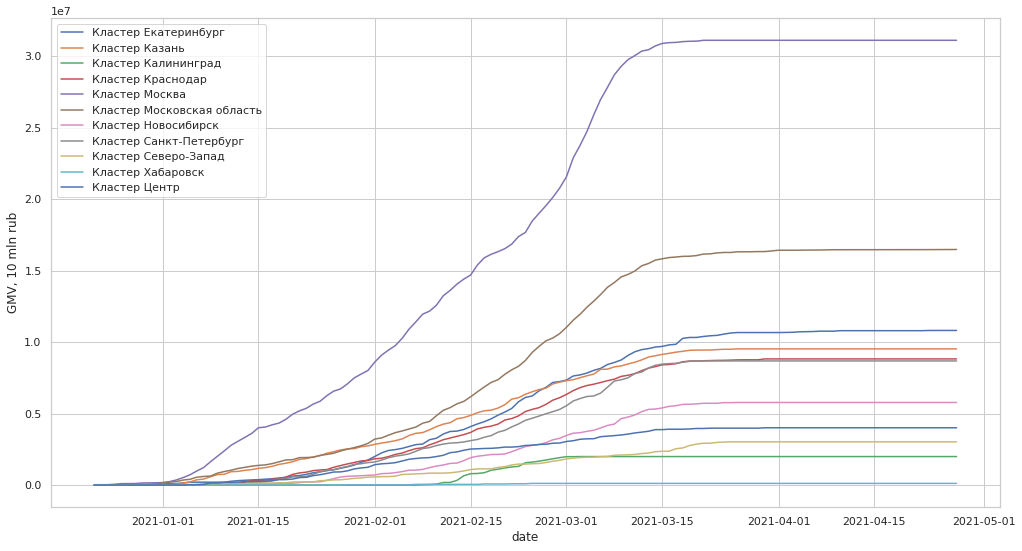

In [147]:
ax = sns.lineplot(data = GMV_warehouse, x = 'date', y = 'Ekaterinburg_GMV', label = 'Кластер Екатеринбург')
sns.lineplot(data = GMV_warehouse, x = 'date', y = 'Kazan_GMV', label = 'Кластер Казань')
sns.lineplot(data = GMV_warehouse, x = 'date', y = 'Kaliningrad_GMV', label = 'Кластер Калининград')
sns.lineplot(data = GMV_warehouse, x = 'date', y = 'Krasnodar_GMV', label = 'Кластер Краснодар')
sns.lineplot(data = GMV_warehouse, x = 'date', y = 'Moscow_GMV', label = 'Кластер Москва')
sns.lineplot(data = GMV_warehouse, x = 'date', y = 'MoscowRegion_GMV', label = 'Кластер Московская область')
sns.lineplot(data = GMV_warehouse, x = 'date', y = 'Novosibirsk_GMV', label = 'Кластер Новосибирск')
sns.lineplot(data = GMV_warehouse, x = 'date', y = 'SaintPetersburg_GMV', label = 'Кластер Санкт-Петербург')
sns.lineplot(data = GMV_warehouse, x = 'date', y = 'Northwest_GMV', label = 'Кластер Северо-Запад')
sns.lineplot(data = GMV_warehouse, x = 'date', y = 'Khabarovsk_GMV', label = 'Кластер Хабаровск')
sns.lineplot(data = GMV_warehouse, x = 'date', y = 'Centre_GMV', label = 'Кластер Центр')
plt.legend()
ax.set_ylabel('GMV, 10 mln rub')

5. Посчитать Return Rate - доля возвратов (отношение количества возвратов к заказам в этот день), в %.

Необходимо видеть изменение метрики по дням;

Необходимы разрезы по перевозчикам, по кластерам склада и клиента;

In [148]:
# Таблица returns_online содержит данные о возвратах, загрузим её в датафрейм returns
returns = pd.read_csv('https://drive.google.com/uc?export=download&id=1mvxtNHJODWJtXjDW1R9bCnJFK55248T2')

In [149]:
# Посмотрим на данные
returns.head()
# number_order - уникальный номер заказа клиента 
#     (в столбце номер может повторяться, т.к. так как в одном заказе может быть несколько товаров)
# product_ID - уникальный номер товара 
#     (в столбце номер может повторяться, т.к. так как один товар может быть в заказах нескольких клиентов)
# amount_return - количество единиц товара, которые были возвращены 
#     (не больше, чем количество единиц товара, приобретенных в указаном заказе)
# return_date - дата совершения возврата

,number_order,product_ID,amount_return,return_date
0,3031410942,983588011,1,1970-01-01
1,31014374140,983586554,1,2021-07-01
2,3147145173,983589156,1,2021-11-01
3,3141464669,983589362,1,2021-11-01
4,3131450699,983589729,3,2021-12-01


In [150]:
# Посмотрим на размер датафрейма
returns.shape

(496, 4)

In [151]:
# Посчитаем количество уникальных значений в каждом столбце
returns.nunique()

number_order     282
product_ID       338
amount_return      4
return_date       28
dtype: int64

In [152]:
# Посчитаем количество пропущенных значений в каждом столбце
returns.isna().sum()
# Их нет

number_order     0
product_ID       0
amount_return    0
return_date      0
dtype: int64

In [153]:
# Посмотрим на типы данных
returns.dtypes
# Столбец return_date нужно привести к типу datetime

number_order      int64
product_ID        int64
amount_return     int64
return_date      object
dtype: object

In [154]:
# Посмотрим на уникальные значения в столбце return_date
returns.return_date.unique()
# Данные представлены за январь-март 2021 года + 1 января 1970 (видимо это ошибочные данные), формат гггг-дд-мм

array(['1970-01-01', '2021-07-01', '2021-11-01', '2021-12-01',
       '2021-01-02', '2021-02-02', '2021-03-02', '2021-04-02',
       '2021-05-02', '2021-06-02', '2021-07-02', '2021-08-02',
       '2021-09-02', '2021-10-02', '2021-11-02', '2021-12-02',
       '2021-01-03', '2021-02-03', '2021-03-03', '2021-04-03',
       '2021-05-03', '2021-06-03', '2021-07-03', '2021-08-03',
       '2021-09-03', '2021-10-03', '2021-11-03', '2021-12-03'],
      dtype=object)

In [155]:
# Теперь переведем тип столбца return_date в datetime
returns['return_date'] = pd.to_datetime(returns.return_date, format='%Y-%d-%m')

In [156]:
# Создадим копию датафрейма о возвратах для этого задания
returns_1 = returns.copy(deep=True)

In [157]:
# Сохраним номера заказов, которые вернули, в список returns_number
returns_number = returns_1.number_order.unique().tolist()

In [158]:
# Создадим копию датафрейма о логистике для этого задания
logistics_5 = logistics.copy(deep = True)

In [159]:
#Оставим только первые записи о каждом заказе
logistics_5 = logistics_5.loc[logistics.timeslot_number == 1]

In [160]:
# Создадим столбец return, в котором 1 - значит заказ был возвращен, 0 - если нет
logistics_5['return'] = [1 if x in returns_number else 0 for x in logistics_5['number_order']]

In [161]:
# Посчитаем количество сделанных заказов и сколько из них вернули, по дням
ReturnRate_metrics = logistics_5.groupby('date_order', as_index = False)\
    .agg({'number_order' : 'count', 'return' : 'sum'})\
    .rename(columns = {'number_order' : 'orders', 'return' : 'returns'})

In [162]:
# Посчитаем метрику ReturnRate в %
ReturnRate_metrics['ReturnRate'] = round(100 * ReturnRate_metrics.returns / ReturnRate_metrics.orders, 1)
ReturnRate_metrics
# Будем помнить, что показатель может измениться со временем, если заказы ещё будут возвращать

,date_order,orders,returns,ReturnRate
0,2020-12-21,1,0,0.0
1,2020-12-22,1,0,0.0
2,2020-12-23,1,0,0.0
3,2020-12-24,2,0,0.0
4,2020-12-25,3,0,0.0
...,...,...,...,...
106,2021-04-20,1,0,0.0
107,2021-04-21,1,0,0.0
108,2021-04-22,1,0,0.0
109,2021-04-25,1,0,0.0


/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


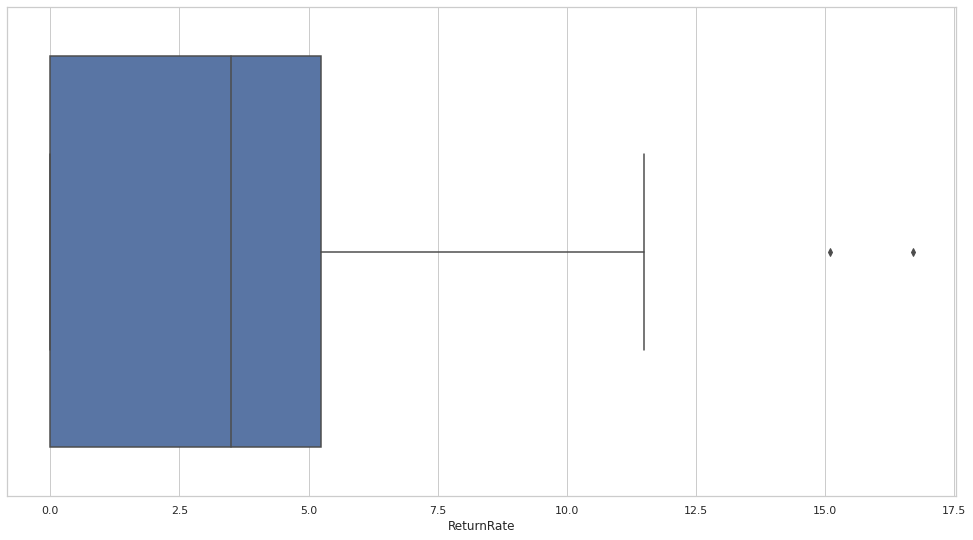

In [163]:
# Посмотрим на распределение значений ReturnRate
sns.boxplot(ReturnRate_metrics.ReturnRate)
# Выбросы есть, поэтому будем использовать не среднее, а медиану

In [164]:
# Посчитаем медианное значение ReturnRate за весь имеющийся период
ReturnRate_median = round(ReturnRate_metrics.ReturnRate.median(), 1)
ReturnRate_median

3.5

In [165]:
# Для следующего шага добавим значение мдианы в датафрейм с метрикой по дням
ReturnRate_metrics['ReturnRate_median'] = ReturnRate_median

Text(0, 0.5, 'ReturnRate, %')

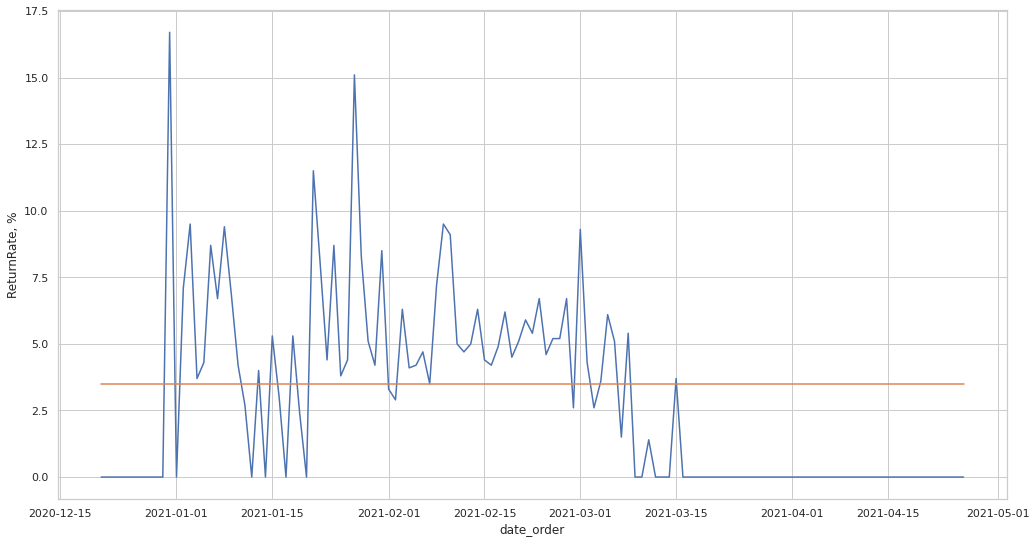

In [166]:
# Построим визуализацию метрики ReturnRate по дням и линию среднего
ax = sns.lineplot(data = ReturnRate_metrics, x = 'date_order', y = 'ReturnRate')
sns.lineplot(data = ReturnRate_metrics, x = 'date_order', y = 'ReturnRate_median')
ax.set_ylabel('ReturnRate, %')

In [167]:
# Посчитаем ReturnRate в разрезе по перевозчикам
ReturnRate_carrier = logistics_5.groupby(['date_order', 'carrier_name'], as_index = False)\
    .agg({'number_order' : 'nunique', 'return' : 'sum'})\
    .rename(columns = {'number_order' : 'orders', 'return' : 'returns'})

In [168]:
ReturnRate_carrier['ReturnRate'] = round(100 * ReturnRate_carrier.returns / ReturnRate_carrier.orders, 1)

In [169]:
ReturnRate_carrier = ReturnRate_carrier\
    .pivot(index = 'date_order', columns = 'carrier_name', values = 'ReturnRate')\
    .reset_index()
ReturnRate_carrier

carrier_name,date_order,3PL 1,3PL 2,3PL 3,3PL 4,Самодоставка
0,2020-12-21,NaN,0.0,NaN,NaN,NaN
1,2020-12-22,NaN,0.0,NaN,NaN,NaN
2,2020-12-23,0.0,NaN,NaN,NaN,NaN
3,2020-12-24,NaN,0.0,NaN,NaN,NaN
4,2020-12-25,NaN,0.0,NaN,NaN,0.0
...,...,...,...,...,...,...
106,2021-04-20,NaN,NaN,NaN,NaN,0.0
107,2021-04-21,NaN,NaN,NaN,NaN,0.0
108,2021-04-22,NaN,NaN,NaN,NaN,0.0
109,2021-04-25,NaN,NaN,NaN,NaN,0.0


Text(0, 0.5, 'ReturnRate, %')

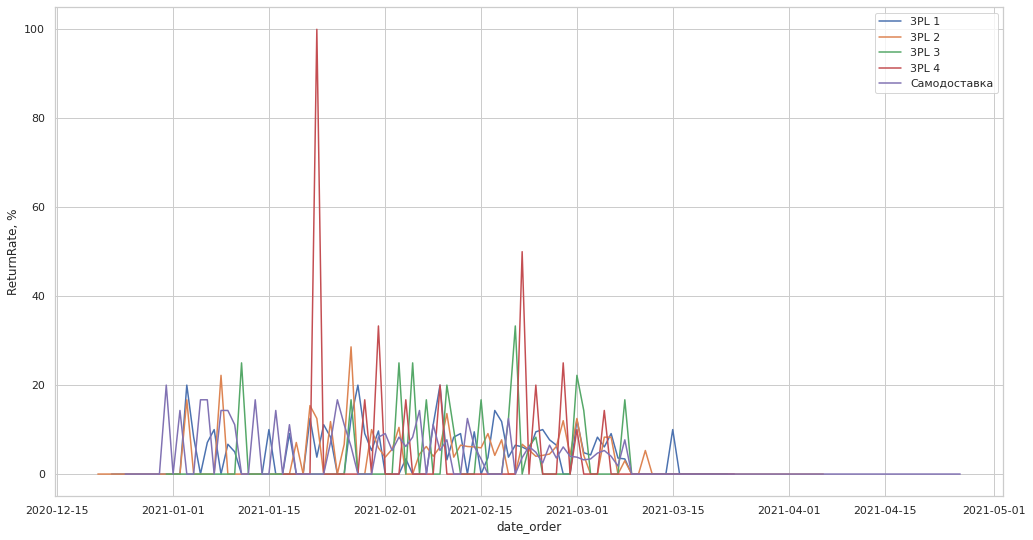

In [170]:
ax = sns.lineplot(data = ReturnRate_carrier, x = 'date_order', y = '3PL 1', label = '3PL 1')
sns.lineplot(data = ReturnRate_carrier, x = 'date_order', y = '3PL 2', label = '3PL 2')
sns.lineplot(data = ReturnRate_carrier, x = 'date_order', y = '3PL 3', label = '3PL 3')
sns.lineplot(data = ReturnRate_carrier, x = 'date_order', y = '3PL 4', label = '3PL 4')
sns.lineplot(data = ReturnRate_carrier, x = 'date_order', y = 'Самодоставка', label = 'Самодоставка')
plt.legend()
ax.set_ylabel('ReturnRate, %')

In [171]:
# Посчитаем ReturnRate в разрезе по кластерам склада
ReturnRate_warehouse = logistics_5.groupby(['date_order', 'warehouse_cluster'], as_index = False)\
    .agg({'number_order' : 'nunique', 'return' : 'sum'})\
    .rename(columns = {'number_order' : 'orders', 'return' : 'returns'})

In [172]:
ReturnRate_warehouse['ReturnRate'] = round(100 * ReturnRate_warehouse.returns / ReturnRate_warehouse.orders)

In [173]:
ReturnRate_warehouse = ReturnRate_warehouse\
    .pivot(index = 'date_order', columns = 'warehouse_cluster', values = 'ReturnRate')\
    .reset_index()
ReturnRate_warehouse

warehouse_cluster,date_order,Кластер Екатеринбург,Кластер Казань,Кластер Калининград,Кластер Краснодар,Кластер Москва,Кластер Московская область,Кластер Новосибирск,Кластер Санкт-Петербург,Кластер Северо-Запад,Кластер Хабаровск,Кластер Центр
0,2020-12-21,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-12-22,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-12-23,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-12-24,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-12-25,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
106,2021-04-20,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
107,2021-04-21,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
108,2021-04-22,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109,2021-04-25,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN


Text(0, 0.5, 'ReturnRate, %')

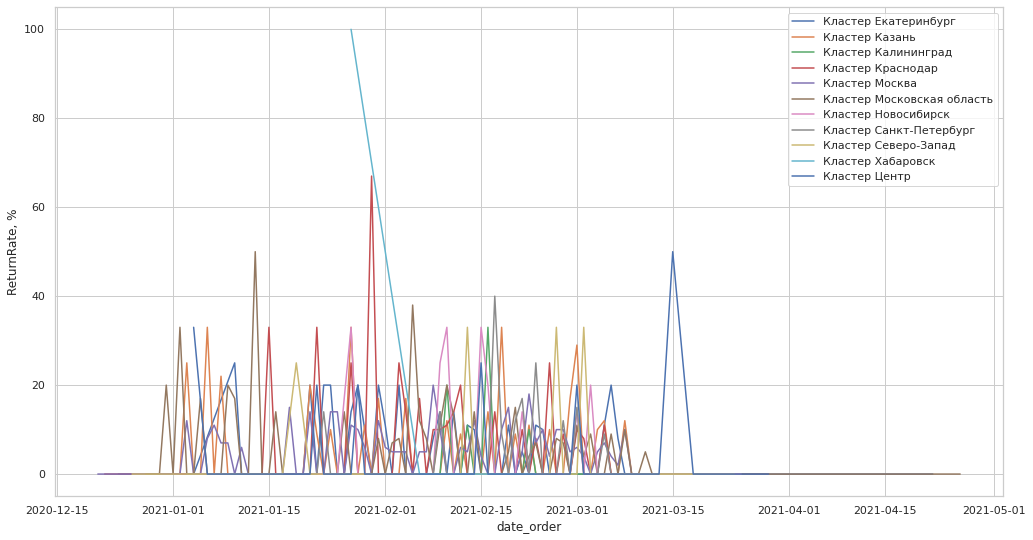

In [174]:
ax = sns.lineplot(data = ReturnRate_warehouse, x = 'date_order', y = 'Кластер Екатеринбург', label = 'Кластер Екатеринбург')
sns.lineplot(data = ReturnRate_warehouse, x = 'date_order', y = 'Кластер Казань', label = 'Кластер Казань')
sns.lineplot(data = ReturnRate_warehouse, x = 'date_order', y = 'Кластер Калининград', label = 'Кластер Калининград')
sns.lineplot(data = ReturnRate_warehouse, x = 'date_order', y = 'Кластер Краснодар', label = 'Кластер Краснодар')
sns.lineplot(data = ReturnRate_warehouse, x = 'date_order', y = 'Кластер Москва', label = 'Кластер Москва')
sns.lineplot(data = ReturnRate_warehouse, x = 'date_order', y = 'Кластер Московская область', label = 'Кластер Московская область')
sns.lineplot(data = ReturnRate_warehouse, x = 'date_order', y = 'Кластер Новосибирск', label = 'Кластер Новосибирск')
sns.lineplot(data = ReturnRate_warehouse, x = 'date_order', y = 'Кластер Санкт-Петербург', label = 'Кластер Санкт-Петербург')
sns.lineplot(data = ReturnRate_warehouse, x = 'date_order', y = 'Кластер Северо-Запад', label = 'Кластер Северо-Запад')
sns.lineplot(data = ReturnRate_warehouse, x = 'date_order', y = 'Кластер Хабаровск', label = 'Кластер Хабаровск')
sns.lineplot(data = ReturnRate_warehouse, x = 'date_order', y = 'Кластер Центр', label = 'Кластер Центр')
plt.legend()
ax.set_ylabel('ReturnRate, %')

In [175]:
# Посчитаем ReturnRate в разрезе по кластерам клиента
ReturnRate_customer = logistics_5.groupby(['date_order', 'customer_cluster'], as_index = False)\
    .agg({'number_order' : 'nunique', 'return' : 'sum'})\
    .rename(columns = {'number_order' : 'orders', 'return' : 'returns'})

In [176]:
ReturnRate_customer['ReturnRate'] = round(100 * ReturnRate_customer.returns / ReturnRate_customer.orders)

In [177]:
ReturnRate_customer = ReturnRate_customer\
    .pivot(index = 'date_order', columns = 'customer_cluster', values = 'ReturnRate')\
    .reset_index()
ReturnRate_customer

customer_cluster,date_order,Кластер Екатеринбург,Кластер Казань,Кластер Калининград,Кластер Краснодар,Кластер Москва,Кластер Московская область,Кластер Новосибирск,Кластер Санкт-Петербург,Кластер Северо-Запад,Кластер Хабаровск,Кластер Центр,Кластер Якутия
0,2020-12-21,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-12-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2,2020-12-23,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-12-24,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-12-25,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,2021-04-20,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107,2021-04-21,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108,2021-04-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
109,2021-04-25,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN


Text(0, 0.5, 'ReturnRate, %')

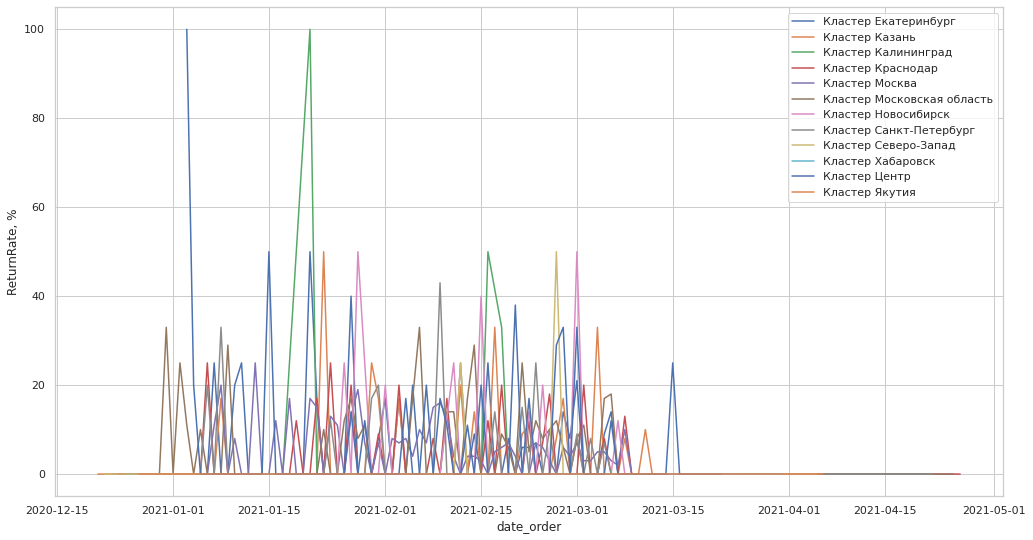

In [178]:
ax = sns.lineplot(data = ReturnRate_customer, x = 'date_order', y = 'Кластер Екатеринбург', label = 'Кластер Екатеринбург')
sns.lineplot(data = ReturnRate_customer, x = 'date_order', y = 'Кластер Казань', label = 'Кластер Казань')
sns.lineplot(data = ReturnRate_customer, x = 'date_order', y = 'Кластер Калининград', label = 'Кластер Калининград')
sns.lineplot(data = ReturnRate_customer, x = 'date_order', y = 'Кластер Краснодар', label = 'Кластер Краснодар')
sns.lineplot(data = ReturnRate_customer, x = 'date_order', y = 'Кластер Москва', label = 'Кластер Москва')
sns.lineplot(data = ReturnRate_customer, x = 'date_order', y = 'Кластер Московская область', label = 'Кластер Московская область')
sns.lineplot(data = ReturnRate_customer, x = 'date_order', y = 'Кластер Новосибирск', label = 'Кластер Новосибирск')
sns.lineplot(data = ReturnRate_customer, x = 'date_order', y = 'Кластер Санкт-Петербург', label = 'Кластер Санкт-Петербург')
sns.lineplot(data = ReturnRate_customer, x = 'date_order', y = 'Кластер Северо-Запад', label = 'Кластер Северо-Запад')
sns.lineplot(data = ReturnRate_customer, x = 'date_order', y = 'Кластер Хабаровск', label = 'Кластер Хабаровск')
sns.lineplot(data = ReturnRate_customer, x = 'date_order', y = 'Кластер Центр', label = 'Кластер Центр')
sns.lineplot(data = ReturnRate_customer, x = 'date_order', y = 'Кластер Якутия', label = 'Кластер Якутия')
plt.legend()
ax.set_ylabel('ReturnRate, %')

6. Посчитать GMV D-R - метрика, отражающая совокупный объем доставленных заказов за вычетом возвратов, в рублях.

Необходимо видеть изменение метрики по дням (для всех дней, которые были раньше, чем дата расчета метрики);

Необходимы разрезы по перевозчикам, по типу доставки, по кластерам склада.

In [179]:
# Создадим копию датафрейма о возвратах для этого задания
returns_2 = returns.copy(deep = True)

In [181]:
# Создадим копию датафрейма о товарах для этого задания
product_2 = product.copy(deep = True)

In [182]:
# Объединим датафреймы
return_product = product_2.merge(returns_2, how = 'inner', on = ['number_order', 'product_ID'])

In [183]:
# Посмотрим на объединенный датафрейм
return_product.head()

,number_order,product_ID,product_price,amount,amount_return,return_date
0,342545229,983582443,3209.04,1,1,1970-01-01
1,346099025,983584827,4589.35,2,2,2021-03-06
2,346099025,983584827,4589.35,2,2,2021-03-07
3,3131450699,983589729,6382.52,3,3,2021-01-12
4,3131450699,983589729,6382.52,3,3,2021-01-12


In [184]:
# В столбце return_price посчитаем стоимость товаров, которые были возвращены 
return_product['return_price'] = return_product.product_price * return_product.amount_return
return_product

,number_order,product_ID,product_price,amount,amount_return,return_date,return_price
0,342545229,983582443,3209.04,1,1,1970-01-01,3209.04
1,346099025,983584827,4589.35,2,2,2021-03-06,9178.70
2,346099025,983584827,4589.35,2,2,2021-03-07,9178.70
3,3131450699,983589729,6382.52,3,3,2021-01-12,19147.56
4,3131450699,983589729,6382.52,3,3,2021-01-12,19147.56
...,...,...,...,...,...,...,...
491,355901679,983580393,7953.59,1,1,2021-03-10,7953.59
492,35961419114,983589871,3200.62,1,1,1970-01-01,3200.62
493,35961419114,983589871,3200.62,1,1,1970-01-01,3200.62
494,35961419114,983583893,8213.47,3,3,1970-01-01,24640.41


In [185]:
# Уберем ненужные нам столбцы
return_product.drop(columns = ['product_ID', 'product_price', 'amount', 'amount_return', 'return_date'], inplace = True)

In [186]:
# Посчитаем сумму возвратов по каждому заказу
returns_price = return_product.groupby('number_order', as_index = False)\
    .agg({'return_price' : 'sum'})\
    .rename(columns = {'return_price' : 'total_return_price'})
returns_price

,number_order,total_return_price
0,312396246,37826.64
1,314452924,44212.16
2,314909631,7812.37
3,314946464,8741.31
4,315195519,7095.66
...,...,...
277,339145143141,5899.60
278,341414144254,5913.58
279,349142014149,4992.82
280,354140141490,7611.83


In [187]:
# Для этого задания создадим копию датафрейма с данными о логистике и товарах из 4 задания
task_6 = task_4.copy(deep = True)

In [188]:
# Добавим к нему датафрейм с суммами возвратов
full_data = task_6.merge(returns_price, how = 'left', on = 'number_order')

In [189]:
# Посмотрим на получившийся датафрейм
full_data.head()

,number_order,total_price,date_order,planned_data_order,timeslot_number,result_data_order,delivery_type,carrier_name,seller_ID,order_status,customer_cluster,warehouse_cluster,delta_order_plan,delta_order_result,delta_plan_result,total_return_price
0,313655114,17245.11,2021-01-05,2021-01-14,1,2021-01-11,Самовывоз,3PL 1,301202,Доставлен,Кластер Краснодар,Кластер Москва,9,6,-3,NaN
1,315229153,19024.69,2021-01-03,2021-01-11,1,2021-01-08,Курьер,Самодоставка,40560,Доставлен,Кластер Московская область,Кластер Московская область,8,5,-3,NaN
2,3114106095,45515.87,2021-01-08,2021-01-16,1,2021-01-14,Курьер,Самодоставка,40560,Доставлен,Кластер Московская область,Кластер Московская область,8,6,-2,NaN
3,31145541407,33376.42,2021-01-12,2021-01-20,1,2021-01-15,Самовывоз,3PL 1,301202,Доставлен,Кластер Санкт-Петербург,Кластер Москва,8,3,-5,NaN
4,325050136,25225.47,2021-01-16,2021-01-26,1,2021-01-25,Самовывоз,3PL 1,946233,Доставлен,Кластер Санкт-Петербург,Кластер Санкт-Петербург,10,9,-1,NaN


In [190]:
# Заполним пропущенные значения 0 (это будет значить, что сумма возврата по этому заказу составила 0 рублей)
full_data['total_return_price'] = full_data.total_return_price.fillna(0)

In [191]:
# Оставим только доставленные заказы
full_data = full_data.loc[full_data['order_status'] == "Доставлен"]

In [192]:
# Посчитаем общую сумму заказов и общую сумму возвратов, по дням
GMV_DR_metrics = full_data.groupby('date_order', as_index = False)\
    .agg({'total_price' : 'sum', 'total_return_price' : 'sum'})

In [193]:
# Посчитаем разницу между общей суммой заказов и общей суммой возвратов
GMV_DR_metrics['total_price_without_returns'] = GMV_DR_metrics.total_price - GMV_DR_metrics.total_return_price

In [194]:
# Посчитаем метрику GMV D-R
GMV_DR_metrics['GMV_DR'] = GMV_DR_metrics.total_price_without_returns.cumsum()

In [195]:
# Для следующего шага переведем столбец date_order в формат datetime
GMV_DR_metrics['date_order'] = pd.to_datetime(GMV_DR_metrics['date_order'])

In [196]:
# Создадим столбец date, который будет на 1 день опережать столбец date_order 
#     (ведь для метрики GMV D-R нужна сумма всех заказов ДО текущего дня)
GMV_DR_metrics['date'] = GMV_DR_metrics.date_order + dt.timedelta(days=1)

In [197]:
# Оставим только нужные нам столбцы
GMV_DR_metrics = GMV_DR_metrics.filter(items = ['date', 'GMV_DR'])
GMV_DR_metrics

,date,GMV_DR
0,2020-12-22,24288.67
1,2020-12-23,36397.17
2,2020-12-24,40704.27
3,2020-12-25,73652.79
4,2020-12-26,151022.25
...,...,...
80,2021-03-12,81220135.09
81,2021-03-13,81557988.74
82,2021-03-14,81738878.17
83,2021-03-15,81839396.26


Text(0, 0.5, 'GMV_DR, 10 mln rub')

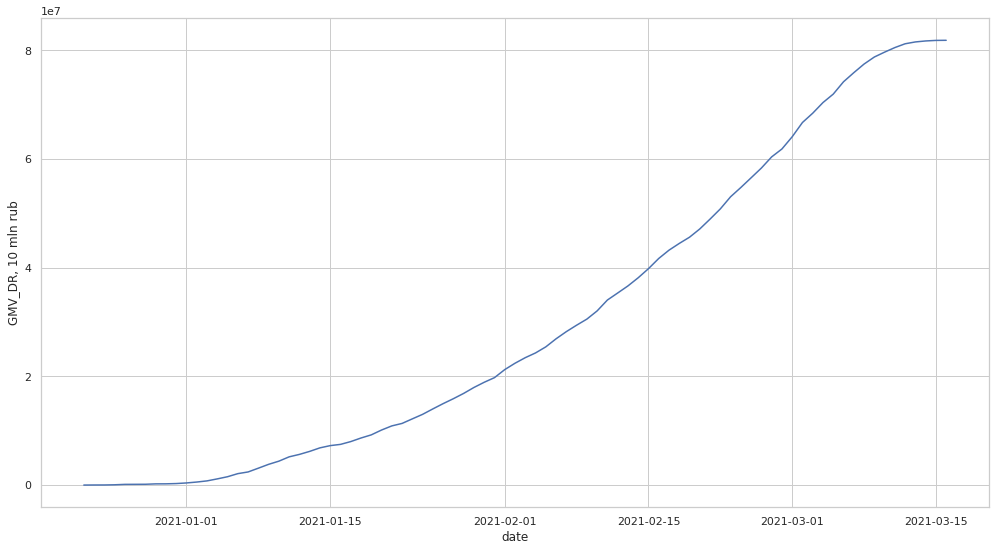

In [198]:
# Построим визуализацию метрики GMV D-R
ax = sns.lineplot(data = GMV_DR_metrics, x = 'date', y = 'GMV_DR')
ax.set_ylabel('GMV_DR, 10 mln rub')

In [199]:
# Посчитаем метрику GMV D-R в разрезе по перевозчикам
GMV_DR_carrier = full_data.groupby(['date_order', 'carrier_name'], as_index = False)\
    .agg({'total_price' : 'sum', 'total_return_price' : 'sum'})

In [200]:
GMV_DR_carrier['total_price_without_returns'] = GMV_DR_carrier.total_price - GMV_DR_carrier.total_return_price

In [201]:
GMV_DR_carrier = GMV_DR_carrier\
    .pivot(index = 'date_order', columns = 'carrier_name', values = 'total_price_without_returns')\
    .reset_index()

In [202]:
GMV_DR_carrier = GMV_DR_carrier.fillna(0)

In [203]:
GMV_DR_carrier['3PL_1_GMV_DR'] = GMV_DR_carrier['3PL 1'].cumsum()
GMV_DR_carrier['3PL_2_GMV_DR'] = GMV_DR_carrier['3PL 2'].cumsum()
GMV_DR_carrier['3PL_3_GMV_DR'] = GMV_DR_carrier['3PL 3'].cumsum()
GMV_DR_carrier['3PL_4_GMV_DR'] = GMV_DR_carrier['3PL 4'].cumsum()
GMV_DR_carrier['Selfdelivery_GMV_DR'] = GMV_DR_carrier['Самодоставка'].cumsum()

In [204]:
GMV_DR_carrier['date_order'] = pd.to_datetime(GMV_DR_carrier['date_order'])

In [205]:
GMV_DR_carrier['date'] = GMV_DR_carrier.date_order + dt.timedelta(days=1)

In [206]:
GMV_DR_carrier = GMV_DR_carrier\
    .filter(items = ['date', '3PL_1_GMV_DR', '3PL_2_GMV_DR', '3PL_3_GMV_DR', '3PL_4_GMV_DR', 'Selfdelivery_GMV_DR'])
GMV_DR_carrier

carrier_name,date,3PL_1_GMV_DR,3PL_2_GMV_DR,3PL_3_GMV_DR,3PL_4_GMV_DR,Selfdelivery_GMV_DR
0,2020-12-22,0.00,24288.67,0.00,0.00,0.00
1,2020-12-23,0.00,36397.17,0.00,0.00,0.00
2,2020-12-24,4307.10,36397.17,0.00,0.00,0.00
3,2020-12-25,4307.10,69345.69,0.00,0.00,0.00
4,2020-12-26,4307.10,94278.63,0.00,0.00,52436.52
...,...,...,...,...,...,...
80,2021-03-12,26363311.80,23286833.55,5535340.38,2835088.55,23199560.81
81,2021-03-13,26506675.25,23422457.33,5535340.38,2878284.05,23215231.73
82,2021-03-14,26636740.59,23473281.42,5535340.38,2878284.05,23215231.73
83,2021-03-15,26660202.52,23550337.58,5535340.38,2878284.05,23215231.73


Text(0, 0.5, 'GMV_DR, 10 mln rub')

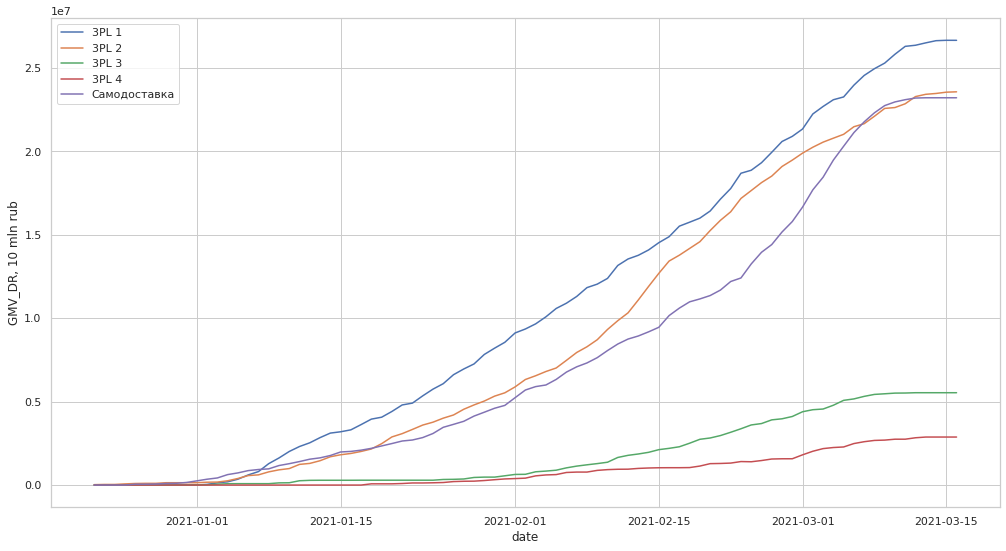

In [207]:
ax = sns.lineplot(data = GMV_DR_carrier, x = 'date', y = '3PL_1_GMV_DR', label = '3PL 1')
sns.lineplot(data = GMV_DR_carrier, x = 'date', y = '3PL_2_GMV_DR', label = '3PL 2')
sns.lineplot(data = GMV_DR_carrier, x = 'date', y = '3PL_3_GMV_DR', label = '3PL 3')
sns.lineplot(data = GMV_DR_carrier, x = 'date', y = '3PL_4_GMV_DR', label = '3PL 4')
sns.lineplot(data = GMV_DR_carrier, x = 'date', y = 'Selfdelivery_GMV_DR', label = 'Самодоставка')
plt.legend()
ax.set_ylabel('GMV_DR, 10 mln rub')

In [208]:
# Посчитаем метрику GMV D-R в разрезе по типу доставки
GMV_DR_delivery = full_data.groupby(['date_order', 'delivery_type'], as_index = False)\
    .agg({'total_price' : 'sum', 'total_return_price' : 'sum'})

In [209]:
GMV_DR_delivery['total_price_without_returns'] = GMV_DR_delivery.total_price - GMV_DR_delivery.total_return_price

In [210]:
GMV_DR_delivery = GMV_DR_delivery\
    .pivot(index = 'date_order', columns = 'delivery_type', values = 'total_price_without_returns')\
    .reset_index()

In [211]:
GMV_DR_delivery = GMV_DR_delivery.fillna(0)

In [212]:
GMV_DR_delivery['Courier_GMV_DR'] = GMV_DR_delivery['Курьер'].cumsum()
GMV_DR_delivery['SelfPickup_GMV_DR'] = GMV_DR_delivery['Самовывоз'].cumsum()

In [213]:
GMV_DR_delivery['date_order'] = pd.to_datetime(GMV_DR_delivery['date_order'])

In [214]:
GMV_DR_delivery['date'] = GMV_DR_delivery.date_order + dt.timedelta(days=1)

In [215]:
GMV_DR_delivery = GMV_DR_delivery.filter(items = ['date', 'Courier_GMV_DR', 'SelfPickup_GMV_DR'])
GMV_DR_delivery

delivery_type,date,Courier_GMV_DR,SelfPickup_GMV_DR
0,2020-12-22,0.00,24288.67
1,2020-12-23,0.00,36397.17
2,2020-12-24,0.00,40704.27
3,2020-12-25,0.00,73652.79
4,2020-12-26,52436.52,98585.73
...,...,...,...
80,2021-03-12,42047179.23,39172955.86
81,2021-03-13,42064511.93,39493476.81
82,2021-03-14,42095107.25,39643770.92
83,2021-03-15,42095107.25,39744289.01


Text(0, 0.5, 'GMV_DR, 10 mln rub')

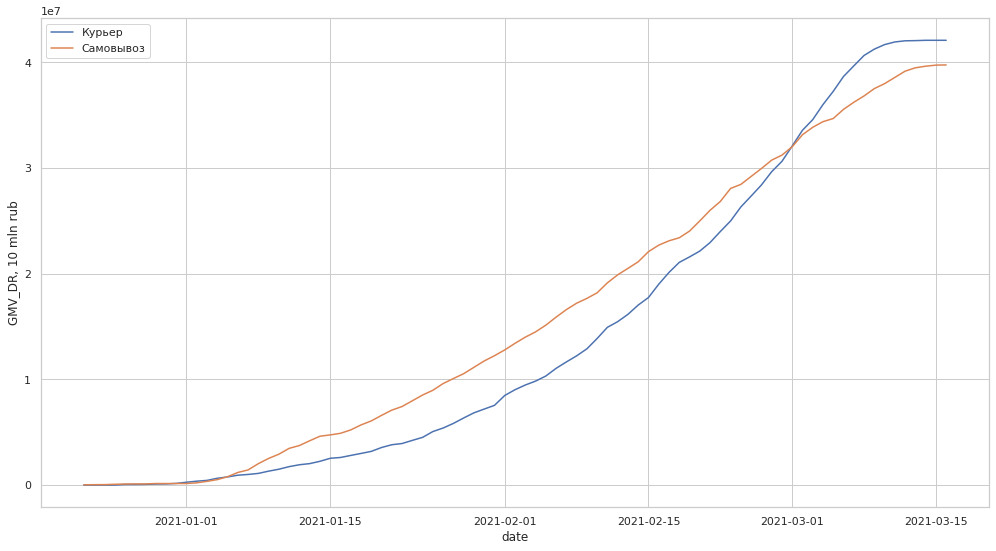

In [216]:
ax = sns.lineplot(data = GMV_DR_delivery, x = 'date', y = 'Courier_GMV_DR', label = 'Курьер')
sns.lineplot(data = GMV_DR_delivery, x = 'date', y = 'SelfPickup_GMV_DR', label = 'Самовывоз')
plt.legend()
ax.set_ylabel('GMV_DR, 10 mln rub')

In [217]:
# Посчитаем метрику GMV D-R в разрезе по кластерам склада
GMV_DR_warehouse = full_data.groupby(['date_order', 'warehouse_cluster'], as_index = False)\
    .agg({'total_price' : 'sum', 'total_return_price' : 'sum'})

In [218]:
GMV_DR_warehouse['total_price_without_returns'] = GMV_DR_warehouse.total_price - GMV_DR_warehouse.total_return_price

In [219]:
GMV_DR_warehouse = GMV_DR_warehouse\
    .pivot(index = 'date_order', columns = 'warehouse_cluster', values = 'total_price_without_returns')\
    .reset_index()

In [220]:
GMV_DR_warehouse = GMV_DR_warehouse.fillna(0)

In [221]:
GMV_DR_warehouse['Ekaterinburg_GMV_DR'] = GMV_DR_warehouse['Кластер Екатеринбург'].cumsum()
GMV_DR_warehouse['Kazan_GMV_DR'] = GMV_DR_warehouse['Кластер Казань'].cumsum()
GMV_DR_warehouse['Kaliningrad_GMV_DR'] = GMV_DR_warehouse['Кластер Калининград'].cumsum()
GMV_DR_warehouse['Krasnodar_GMV_DR'] = GMV_DR_warehouse['Кластер Краснодар'].cumsum()
GMV_DR_warehouse['Moscow_GMV_DR'] = GMV_DR_warehouse['Кластер Москва'].cumsum()
GMV_DR_warehouse['MoscowRegion_GMV_DR'] = GMV_DR_warehouse['Кластер Московская область'].cumsum()
GMV_DR_warehouse['Novosibirsk_GMV_DR'] = GMV_DR_warehouse['Кластер Новосибирск'].cumsum()
GMV_DR_warehouse['SaintPetersburg_GMV_DR'] = GMV_DR_warehouse['Кластер Санкт-Петербург'].cumsum()
GMV_DR_warehouse['Northwest_GMV_DR'] = GMV_DR_warehouse['Кластер Северо-Запад'].cumsum()
GMV_DR_warehouse['Khabarovsk_GMV_DR'] = GMV_DR_warehouse['Кластер Хабаровск'].cumsum()
GMV_DR_warehouse['Centre_GMV_DR'] = GMV_DR_warehouse['Кластер Центр'].cumsum()

In [222]:
GMV_DR_warehouse['date_order'] = pd.to_datetime(GMV_DR_warehouse['date_order'])

In [223]:
GMV_DR_warehouse['date'] = GMV_DR_warehouse.date_order + dt.timedelta(days=1)

In [224]:
GMV_DR_warehouse = GMV_DR_warehouse\
    .filter(items = ['date', 'Ekaterinburg_GMV_DR', 'Kazan_GMV_DR', 'Kaliningrad_GMV_DR', 'Krasnodar_GMV_DR', 'Moscow_GMV_DR' \
                     , 'MoscowRegion_GMV_DR', 'Novosibirsk_GMV_DR', 'SaintPetersburg_GMV_DR', 'Northwest_GMV_DR' \
                     , 'Khabarovsk_GMV_DR', 'Centre_GMV_DR'])
GMV_DR_warehouse

warehouse_cluster,date,Ekaterinburg_GMV_DR,Kazan_GMV_DR,Kaliningrad_GMV_DR,Krasnodar_GMV_DR,Moscow_GMV_DR,MoscowRegion_GMV_DR,Novosibirsk_GMV_DR,SaintPetersburg_GMV_DR,Northwest_GMV_DR,Khabarovsk_GMV_DR,Centre_GMV_DR
0,2020-12-22,0.00,0.00,0.00,0.00,24288.67,0.00,0.00,0.00,0.00,0.00,0.00
1,2020-12-23,0.00,0.00,0.00,12108.50,24288.67,0.00,0.00,0.00,0.00,0.00,0.00
2,2020-12-24,0.00,0.00,0.00,12108.50,28595.77,0.00,0.00,0.00,0.00,0.00,0.00
3,2020-12-25,2789.18,0.00,0.00,12108.50,58755.11,0.00,0.00,0.00,0.00,0.00,0.00
4,2020-12-26,36050.87,0.00,0.00,12108.50,102862.88,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
80,2021-03-12,8826446.05,7878890.12,1917525.27,7061691.23,25168668.40,12983433.90,4931950.65,6843246.28,2059167.88,109470.95,3439644.36
81,2021-03-13,8826446.05,7945771.18,1917525.27,7138019.88,25168668.40,13027355.33,4983847.36,6910547.47,2064498.57,109470.95,3465838.28
82,2021-03-14,8840885.38,7983209.82,1917525.27,7159251.96,25223349.96,13035377.81,4983847.36,6910547.47,2076332.64,109470.95,3499079.55
83,2021-03-15,8846892.80,7983209.82,1917525.27,7199898.72,25240804.47,13035377.81,4983847.36,6940062.55,2083226.96,109470.95,3499079.55


Text(0, 0.5, 'GMV_DR, mln rub')

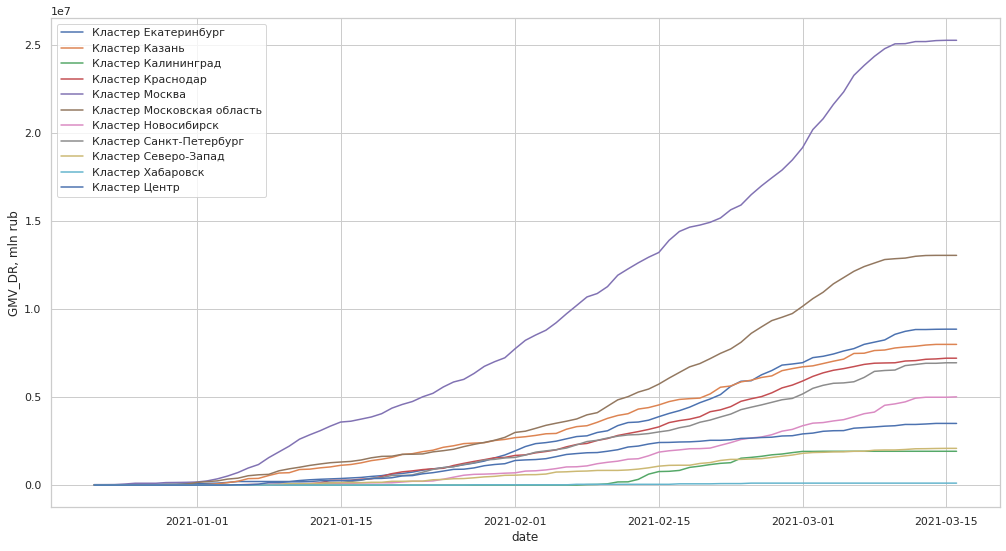

In [225]:
ax = sns.lineplot(data = GMV_DR_warehouse, x = 'date', y = 'Ekaterinburg_GMV_DR', label = 'Кластер Екатеринбург')
sns.lineplot(data = GMV_DR_warehouse, x = 'date', y = 'Kazan_GMV_DR', label = 'Кластер Казань')
sns.lineplot(data = GMV_DR_warehouse, x = 'date', y = 'Kaliningrad_GMV_DR', label = 'Кластер Калининград')
sns.lineplot(data = GMV_DR_warehouse, x = 'date', y = 'Krasnodar_GMV_DR', label = 'Кластер Краснодар')
sns.lineplot(data = GMV_DR_warehouse, x = 'date', y = 'Moscow_GMV_DR', label = 'Кластер Москва')
sns.lineplot(data = GMV_DR_warehouse, x = 'date', y = 'MoscowRegion_GMV_DR', label = 'Кластер Московская область')
sns.lineplot(data = GMV_DR_warehouse, x = 'date', y = 'Novosibirsk_GMV_DR', label = 'Кластер Новосибирск')
sns.lineplot(data = GMV_DR_warehouse, x = 'date', y = 'SaintPetersburg_GMV_DR', label = 'Кластер Санкт-Петербург')
sns.lineplot(data = GMV_DR_warehouse, x = 'date', y = 'Northwest_GMV_DR', label = 'Кластер Северо-Запад')
sns.lineplot(data = GMV_DR_warehouse, x = 'date', y = 'Khabarovsk_GMV_DR', label = 'Кластер Хабаровск')
sns.lineplot(data = GMV_DR_warehouse, x = 'date', y = 'Centre_GMV_DR', label = 'Кластер Центр')
plt.legend()
ax.set_ylabel('GMV_DR, mln rub')

In [226]:
# Для создания дашборда в Tableau сохраним подготовленные датафреймы в файлы csv
logistics.to_csv('logistics.csv')
product.to_csv('product.csv')
returns.to_csv('returns.csv')

Ссылка на дашборд: https://public.tableau.com/app/profile/olesya.ogurtsova/viz/Ozon_16605802697490/Ozonmetrics

**На этом итоговый проект окончен. Если по нему есть вопросы, напишите мне в Телеграм @lesenock**